> # **Final Project - Bank Marketing Campaign**

Group   : Zeta Squad

Member  :
- Zaki Fajri
- Monika Pangestu
- Deryl Baharudin

---
# **Business Problem and Data Understanding**
---



## **Define Business Problem**

### **Context**

Bank or Financial services experienced a dramatic change in terms of technology, strategy, and customer service due to globalization of economics. This situation challenge every banking sector to adopt the emerging technologies and applied them in their internal business. Its also mean how those banking sectors can use the technology in embracing their customers. 

One of technology-enabled marketing practice that many of banking sector applied these days called telemarketing.


>***Telemarketing*** : *is a direct marketing strategy method in which a salesperson acquires the prospective customer's willingness to purchase products or services over phone calls.*

In simply way, the bank embrace the customer through phone calls and offer their products. Those campaigns activity usually carried out by the marketing department or Customer Care & Telemarketing.

We must keep in mind that every campaign that were carried out are inseparable with operational costs. The effectiveness and efficiency of these activities will certainly affect operational costs. And this is the main concern for every banking sector : minimize/maintain the cost in order maximize the gain.

Portuguese Bank is one of the banking sector that are experiencing the same concern. They offering the client's to place a term deposit through telemarketing. But there has been a revenue decline and would like to know what actions to take.

Zeta Squad as the Bank's DS team has an important task to find out the root cause and provide appropiate recommendations in order to increase the revenue.

### **Problem**

**> Problem Stakeholder : Portuguese Bank**


From Portugal bank data, we found out that only few customer opened term deposits (appx. 11% of total customer that contacted by the marketing teams). This is one of the reasons why the decline in revenue occurred. We can see that there might be a campaign failure in the process. This indicate that the campaign didn't inline with the targeted customer. Which also mean that the bank marketing teams has not effectively delivered the right campaigns to the right customers. They did the same campaign to every single customers without did the selection first (which most likely to open the deposit & not open the deposit). This behaviour leads to several problems :

- For corporate business:
    - Waste of time, human resources, and operational costs for unsuccessful telemarketing activities.
    - Loss of potential customers because wasted resources should be used for more potential consumers.

- For Customers:
    - Consumers are annoyed with junk phones.

### **Goals**

**> Goals Stakeholder : Zeta Squad**

It would be better and effective if the bank marketing teams know which customers that most likely interested in opening a deposit, so they can maximized the resource and minimized the loss.

Our goal is:
1. Create a machine learning model to predict customers who most likely make deposits, so that banks can maximize campaigns that are carried out. Our target is to create a machine learning with good performance to predict customer's choice.

2. Find out which factors that can influence a customer's decision to make a deposit or not, so that banks can create more effective campaigns.

### **Analytics Approach**

These are the following steps that will be performed to complete the task:

1. Loading the data & Do data conditioning
2. Do Exploratory Data Analysis (EDA) to gain more insight regarding the problem
3. Pre-processing the data
4. Modeling the Data
5. Search for optimal parameters of the model
6. Evaluate the Model
7. Conclusions & recomendations



## **Data Understanding**

#### Data Source

Dataset Source: https://www.kaggle.com/datasets/volodymyrgavrysh/bank-marketing-campaigns-dataset which the data modified from [Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014

#### Dataset Description

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.
- Data Set Characteristics: Multivariate
- Attribute Characteristics: Real
- Associated Tasks: Classification
- Number of Instances: 41188
- Number of Attributes: 21
- Missing Values: coded as **'unknown'**
- Area: Business
- Dataset period: from May 2008 to November 2010

#### Attributes Information

Input variables:
- Bank client data:
  1. `age` (numeric)
  2. `job` : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
  3. `marital` : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
  4. `education` (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
  5. `default`: has credit in default? (categorical: 'no','yes','unknown')
  6. `housing`: has housing loan? (categorical: 'no','yes','unknown')
  7. `loan`: has personal loan? (categorical: 'no','yes','unknown')

- Related with the last contact of the current campaign:
  8. `contact`: contact communication type (categorical: 'cellular','telephone')
  9. `month`: last contact month of year (categorical: 'mar' to 'dec')
  10. `day_of_week`: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
  11. `duration`: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

- Other attributes:
  12. `campaign`: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  13. `pdays`: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
  14. `previous`: number of contacts performed before this campaign and for this client (numeric)
  15. `poutcome`: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

- Social and economic context attributes:
  16. `emp.var.rate`: employment variation rate - quarterly indicator (numeric)
  17. `cons.price.idx`: consumer price index - monthly indicator (numeric)
  18. `cons.conf.idx`: consumer confidence index - monthly indicator (numeric)
  19. `euribor3m`: euribor 3 month rate - daily indicator (numeric)
  20. `nr.employed`: number of employees - quarterly indicator (numeric)

- Output variable (desired target):
  21. `y` - has the client subscribed a term deposit? (binary: 'yes','no')

---
# **Import Dataset & Libraries**
---

In [ ]:
!pip install category_encoders
# !pip install dython


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
    # Library
    import pandas as pd
    import numpy as np

    # Visualization
    import matplotlib.pyplot as plt
    import seaborn as sns
    import missingno
    from IPython.display import display
    # from dython.nominal import associations
    # from dython.nominal import identify_nominal_columns

    # Feature Engineering
    from sklearn.pipeline import Pipeline
    from sklearn.impute import SimpleImputer
    from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
    from sklearn.compose import ColumnTransformer
    import category_encoders as ce
    from sklearn.preprocessing import RobustScaler, StandardScaler


    # Model Selection
    from sklearn.linear_model import LogisticRegression
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.model_selection import GridSearchCV,StratifiedKFold,train_test_split, cross_val_score, KFold
    from sklearn.metrics import classification_report, confusion_matrix
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.ensemble import RandomForestClassifier
    from xgboost import XGBClassifier
    from sklearn.ensemble import GradientBoostingClassifier
    from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
    from sklearn.metrics import roc_curve, roc_auc_score, plot_roc_curve
    from sklearn.metrics import RocCurveDisplay
    from sklearn.metrics import roc_auc_score, roc_curve
    from sklearn.model_selection import cross_val_score
    from sklearn import metrics
    from sklearn.metrics import precision_recall_curve
    from sklearn.metrics import plot_precision_recall_curve
    
    # Imbalance Dataset
    from imblearn.pipeline import Pipeline
    from imblearn.over_sampling import RandomOverSampler, SMOTE
    from imblearn.under_sampling import RandomUnderSampler

    # Ignore Warning
    import sys
    import warnings
    if not sys.warnoptions:
        warnings.simplefilter("ignore")

    # Set max columns
    pd.set_option('display.max_columns', None)

In [ ]:
# Load Data
bmc=pd.read_csv("bank-additional-full.csv", sep=';')

---
# **Data Conditioning**
---

In [ ]:
bmc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

Since missing values are coded as **unknown**, therefore, all unknown data will be replace with NaN that will be dropped later on

In [ ]:
bmc.replace('unknown', np.nan, inplace = True)

In [ ]:
bmc.sample(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
24277,40,admin.,married,university.degree,NaN,no,no,telephone,nov,mon,16,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
10171,43,blue-collar,married,basic.4y,no,NaN,NaN,telephone,jun,thu,1618,2,999,0,nonexistent,1.4,94.465,-41.8,4.958,5228.1,yes
29907,30,student,single,university.degree,no,yes,no,cellular,apr,mon,23,6,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,no
30246,33,services,married,high.school,no,yes,no,cellular,apr,thu,524,2,999,0,nonexistent,-1.8,93.075,-47.1,1.365,5099.1,no
37526,36,technician,married,professional.course,no,yes,no,cellular,aug,thu,92,2,999,1,failure,-2.9,92.201,-31.4,0.873,5076.2,no
14697,33,admin.,single,high.school,no,yes,no,cellular,jul,tue,498,5,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,no
18659,38,admin.,married,high.school,no,yes,no,telephone,jul,thu,51,18,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
18212,36,blue-collar,married,professional.course,no,NaN,NaN,cellular,jul,wed,153,3,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,no
28235,46,services,married,NaN,no,yes,no,cellular,apr,tue,244,3,999,1,failure,-1.8,93.075,-47.1,1.453,5099.1,no
39606,52,admin.,married,university.degree,no,no,no,cellular,may,thu,195,1,999,0,nonexistent,-1.8,93.876,-40.0,0.677,5008.7,yes


In [ ]:
# Modify Column's Name
bmc = bmc.rename(columns={
                'y':'deposit',
                'day_of_week':'day',
                'emp.var.rate':'emp_var_rate',
                'cons.price.idx':'cons_price_idx',
                'cons.conf.idx':'cons_conf_idx',
                'nr.employed':'nr_employed'})


In [ ]:
for col in bmc.select_dtypes(include='object').columns:
    print(col)
    print(bmc[col].unique())

job
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' nan 'entrepreneur' 'student']
marital
['married' 'single' 'divorced' nan]
education
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course' nan
 'university.degree' 'illiterate']
default
['no' nan 'yes']
housing
['no' 'yes' nan]
loan
['no' 'yes' nan]
contact
['telephone' 'cellular']
month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
day
['mon' 'tue' 'wed' 'thu' 'fri']
poutcome
['nonexistent' 'failure' 'success']
deposit
['no' 'yes']


## **Dropping Missing Value**

Based on the data set, there are 6 variables that have missing values. They are:
* `job` with 0.8% missing data
* `marital` with 0.19% missing data
* `education` with 4.2% missing data
* `default` with 20.87% missing data
* `housing` with 2.4% missing data
* `loan` with 2.4 missing data

with that information we decide to remove all missing data that are not significantly reducing the data samples. Hence, all missing data from those variables will be dropped except for `default`.

In [ ]:
listItem = []
for col in bmc.columns :
    listItem.append([col, bmc[col].dtype, bmc[col].isna().sum(), round((bmc[col].isna().sum()/len(bmc[col])) * 100,2),
                    bmc[col].nunique(), list(bmc[col].drop_duplicates().sample(2).values)]);

bmcDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
bmcDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,age,int64,0,0.00,78,"[28, 24]"
1,job,object,330,0.80,11,"[housemaid, management]"
2,marital,object,80,0.19,3,"[divorced, married]"
3,education,object,1731,4.20,7,"[basic.6y, basic.4y]"
4,default,object,8597,20.87,2,"[nan, no]"
5,housing,object,990,2.40,2,"[nan, yes]"
6,loan,object,990,2.40,2,"[no, nan]"
7,contact,object,0,0.00,2,"[cellular, telephone]"
8,month,object,0,0.00,10,"[dec, mar]"
9,day,object,0,0.00,5,"[mon, fri]"


In [ ]:
bmc_2 = bmc.copy()

In [ ]:
bmc_2.dropna(subset=['job', 'marital','education','housing','loan'], inplace=True)

In [ ]:
bmc_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38245 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             38245 non-null  int64  
 1   job             38245 non-null  object 
 2   marital         38245 non-null  object 
 3   education       38245 non-null  object 
 4   default         30488 non-null  object 
 5   housing         38245 non-null  object 
 6   loan            38245 non-null  object 
 7   contact         38245 non-null  object 
 8   month           38245 non-null  object 
 9   day             38245 non-null  object 
 10  duration        38245 non-null  int64  
 11  campaign        38245 non-null  int64  
 12  pdays           38245 non-null  int64  
 13  previous        38245 non-null  int64  
 14  poutcome        38245 non-null  object 
 15  emp_var_rate    38245 non-null  float64
 16  cons_price_idx  38245 non-null  float64
 17  cons_conf_idx   38245 non-null 

In [ ]:
print('Initial dataset     : ',len(bmc))
print('Filtered dataset    : ',len(bmc_2))
print('Cleaned dataset (%) : ',round(len(bmc_2)/len(bmc)*100,2))

Initial dataset     :  41188
Filtered dataset    :  38245
Cleaned dataset (%) :  92.85


with all the missing value removed, then we are left with 92% of data samples for further analysis.

In [ ]:
listItem = []
for col in bmc.columns :
    listItem.append([col, bmc_2[col].dtype, bmc_2[col].isna().sum(), round((bmc_2[col].isna().sum()/len(bmc_2[col])) * 100,2),
                    bmc_2[col].nunique(), list(bmc_2[col].drop_duplicates().sample(2).values)]);

bmc_2_Desc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
bmc_2_Desc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,age,int64,0,0.00,77,"[56, 35]"
1,job,object,0,0.00,11,"[entrepreneur, unemployed]"
2,marital,object,0,0.00,3,"[married, divorced]"
3,education,object,0,0.00,7,"[university.degree, basic.9y]"
4,default,object,7757,20.28,2,"[yes, nan]"
5,housing,object,0,0.00,2,"[yes, no]"
6,loan,object,0,0.00,2,"[yes, no]"
7,contact,object,0,0.00,2,"[telephone, cellular]"
8,month,object,0,0.00,10,"[jun, mar]"
9,day,object,0,0.00,5,"[wed, fri]"


In [ ]:
bmc_2.describe()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
count,38245.000000,38245.000000,38245.000000,38245.000000,38245.000000,38245.000000,38245.000000,38245.000000,38245.000000,38245.000000
mean,39.860871,258.207583,2.566662,963.531651,0.170009,0.082861,93.570313,-40.541164,3.623298,5167.432566
std,10.289488,259.792638,2.767473,184.295254,0.487169,1.565945,0.576367,4.623200,1.730226,71.760333
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.444000,-41.800000,4.857000,5191.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,4918.000000,43.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [ ]:
bmc_2.describe(include='object')

,job,marital,education,default,housing,loan,contact,month,day,poutcome,deposit
count,38245,38245,38245,30488,38245,38245,38245,38245,38245,38245,38245
unique,11,3,7,2,2,2,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,9937,23183,11821,30485,20578,32286,24441,12794,8011,33066,33987


## **Categorical Data Adjustment**

### Age Structure Grouping

This dataset is based on Portugal Banking System. Instead of having numerical data, we simplify the age structure based on several class as follows:
```
|-------------------------------------------|
|       Age Class       |     Age Range     |
|-----------------------|-------------------|
|   Children            | 0  - 14 years     |
|   Early Working Age   | 15 - 24 years     |
|   Prime Working Age   | 25 - 54 years     |
|   Mature Working Age  | 55 - 64 years     |
|   Elderly             | 65 years and over |
|-----------------------|-------------------|
```
Source: [Portugal Age Structure](https://www.indexmundi.com/portugal/age_structure.html)



In [ ]:
age_bins = [15, 24, 54, 64, 150]
age_labels = ['early working', 'prime working', 'mature working', 'elderly']
bmc_2['age_group'] = pd.cut(bmc_2['age'], bins=age_bins, labels=age_labels)

bmc_2['age_group'].unique()

['mature working', 'prime working', 'early working', 'elderly']
Categories (4, object): ['early working' < 'prime working' < 'mature working' < 'elderly']

### Job Class Adjustment

There are 11 job classes identified in this dataset, such as 'housemaid', 'services', 'admin.', 'technician', 'blue-collar', 'retired', 'management', 'unemployed', 'self-employed', 'entrepreneur', & 'student'. Among all job classes, we merge two of the class (unemployed & retired) as non workers since those classes are no longer in workforce.





In [ ]:
# Merging  retired & unemployed classes
bmc_2['job'] = bmc_2['job'].replace(to_replace=['retired','unemployed'], value=['non-worker','non-worker'])

bmc_2['job'].unique()

array(['housemaid', 'services', 'admin.', 'technician', 'blue-collar',
       'non-worker', 'management', 'self-employed', 'entrepreneur',
       'student'], dtype=object)

### Educational Background Class Modification

The `education` variable is also adjusted based on Portugal Educational System Chart, where as: <br>
1. Basic Education : include `basic.4y`,`basic.6y`,and `basic.9y` (since illiterate data samples are very low then we merge it with basic education group)
2. Secondary Education : this level contains `high.school` and `professional.course`
3. Higher Education : this level starts from `university.degree`, therefore this class will remain as it is.

Source: [Portugal Educational System Chart](https://slideplayer.com/slide/5747283/)

In [ ]:
# Education Class Grouping
bmc_2['education'] = bmc_2['education'].replace(
    to_replace=["basic.4y","basic.6y","basic.9y","illiterate","high.school","professional.course"], 
    value=['illiterate.basic.ed','illiterate.basic.ed','illiterate.basic.ed','illiterate.basic.ed','secondary.ed','secondary.ed'])

bmc_2['education'].unique()

array(['illiterate.basic.ed', 'secondary.ed', 'university.degree'],
      dtype=object)

### Campaign Grouping

In [ ]:
print('Deposit Outcome by campaign (Max Value):')

def deposit_by_campaign():    

    deposit_yes = bmc_2.loc[bmc_2.deposit == 'yes'].groupby(['campaign'])[['deposit']].count()
    deposit_yes.rename(columns={'deposit':'Deposit'}, inplace=True)

    deposit_no = bmc_2.loc[bmc_2.deposit == 'no'].groupby(['campaign'])[['deposit']].count()
    deposit_no.rename(columns={'deposit':'No Deposit'}, inplace=True)

    deposit_merge = pd.concat([deposit_yes, deposit_no], axis=1)
    deposit_merge

    max = deposit_merge.max()
    print(max)
    
    deposit_merge.loc['Total'] = deposit_merge.sum(numeric_only=True, axis=0)
    deposit_merge['Total Count'] = deposit_merge['Deposit']+deposit_merge['No Deposit'] 
    deposit_merge['% of Deposits'] = round((deposit_merge['Deposit']/(deposit_merge['Deposit']+deposit_merge['No Deposit']))*100, 2)

    return deposit_merge.style.format('{:,.0f}')

deposit_by_campaign()

Deposit Outcome by campaign (Max Value):
Deposit        2091.0
No Deposit    14284.0
dtype: float64


,Deposit,No Deposit,Total Count,% of Deposits
campaign,,,,
1,"2,091","14,284","16,375",13
2,"1,120","8,698","9,818",11
3,533,"4,423","4,956",11
4,229,"2,234","2,463",9
5,113,"1,389","1,502",8
6,72,839,911,8
7,35,549,584,6
8,16,356,372,4
9,16,242,258,6


`Campaign` variable is depending on the number of times a telemarketer contacts a consumer on current campaign. Based on the data distribution above, we group the campaign into several classes as follows:

In [ ]:
campaign_bins = [0, 6, 12, 18, 24, 100]
campaign_labels = ['1-6','7-12','13-18','19-24','25+']
bmc_2['campaign_reps'] = pd.cut(bmc_2['campaign'], bins=campaign_bins, labels=campaign_labels)

bmc_2['campaign_reps'].unique()

['1-6', '7-12', '13-18', '19-24', '25+']
Categories (5, object): ['1-6' < '7-12' < '13-18' < '19-24' < '25+']

### Call Response Variable



In [ ]:
print('Deposit Outcome by duration (Max Value):')

def deposit_by_duration():    
    deposit_yes = bmc_2.loc[bmc_2.deposit == 'yes'].groupby(['duration'])[['deposit']].count()
    deposit_yes.rename(columns={'deposit':'Deposit'}, inplace=True)

    deposit_no = bmc_2.loc[bmc_2.deposit == 'no'].groupby(['duration'])[['deposit']].count()
    deposit_no.rename(columns={'deposit':'No Deposit'}, inplace=True)

    deposit_merge = pd.concat([deposit_yes, deposit_no], axis=1)
    deposit_merge

    max = deposit_merge.max()
    print(max)
    
    deposit_merge.loc['Total'] = deposit_merge.sum(numeric_only=True, axis=0)
    deposit_merge['Total Count'] = deposit_merge['Deposit'] + deposit_merge['No Deposit'] 
    deposit_merge['% of Deposits'] = round((deposit_merge['Deposit']/(deposit_merge['Deposit']+deposit_merge['No Deposit']))*100, 2)

    return deposit_merge.style.format('{:,.0f}')

deposit_by_duration()

Deposit Outcome by duration (Max Value):
Deposit        14.0
No Deposit    161.0
dtype: float64


,Deposit,No Deposit,Total Count,% of Deposits
duration,,,,
0,nan,4,nan,nan
1,nan,3,nan,nan
2,nan,1,nan,nan
3,nan,3,nan,nan
4,nan,12,nan,nan
5,nan,29,nan,nan
6,nan,37,nan,nan
7,nan,48,nan,nan
8,nan,63,nan,nan


We create new variable `call_response` based on `duration` variable which classify whether or not a customer responds to a call. We assumed that any duration below 36 seconds as non responsive customer where they might pickup a call but refuse to receive any information from the telemarketing (**NO**). Meanwhile, any duration above 36 seconds are assumed that a customer is willing to listen to the campaign (**YES**).

In [ ]:
dur_bins = [-1, 36, 5000]
dur_labels = ['no','yes']
bmc_2['call_response'] = pd.cut(bmc_2['duration'], bins=dur_bins, labels=dur_labels)

bmc_2['call_response'].unique()

['yes', 'no']
Categories (2, object): ['no' < 'yes']

In [ ]:
bmc_2.describe()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
count,38245.000000,38245.000000,38245.000000,38245.000000,38245.000000,38245.000000,38245.000000,38245.000000,38245.000000,38245.000000
mean,39.860871,258.207583,2.566662,963.531651,0.170009,0.082861,93.570313,-40.541164,3.623298,5167.432566
std,10.289488,259.792638,2.767473,184.295254,0.487169,1.565945,0.576367,4.623200,1.730226,71.760333
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.444000,-41.800000,4.857000,5191.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,4918.000000,43.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


### Previous Days Grouping

`pdays`: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted). We try to classify these days into weekly categories

In [ ]:
bmc_2['pdays'].unique()

array([999,   6,   4,   3,   5,   1,   0,  10,   7,   9,  11,   2,   8,
        12,  13,  14,  15,  16,  21,  17,  18,  22,  25,  26,  19,  27])

In [ ]:
pdays_bins = [-1, 7, 14, 21, 28, 1000]
pdays_labels = ['last_week','last_2weeks', 'last_3weeks', 'last_4weeks', 'not_contacted']
bmc_2['pdays_class'] = pd.cut(bmc_2['pdays'], bins=pdays_bins, labels=pdays_labels)

bmc_2['pdays_class'].unique()

['not_contacted', 'last_week', 'last_2weeks', 'last_3weeks', 'last_4weeks']
Categories (5, object): ['last_week' < 'last_2weeks' < 'last_3weeks' < 'last_4weeks' <
                         'not_contacted']

## **Exploratory Data Analysis (EDA)**
---

### Numerical Data Statistics Summary



In [ ]:
summary_stats = round(bmc_2.describe().T,2)
summary_stats.drop(['count'], axis=1, inplace=True)
summary_stats.rename (columns={'mean':'Mean', 'std': 'Standard Deviation', 'min': 'Minimum', \
                               '25%':'Q1', '50%': 'Median', '75%':'Q3', 'max':'Maximum'}, inplace=True)
summary_stats

,Mean,Standard Deviation,Minimum,Q1,Median,Q3,Maximum
age,39.86,10.29,17.00,32.00,38.00,47.00,98.00
duration,258.21,259.79,0.00,102.00,180.00,319.00,4918.00
campaign,2.57,2.77,1.00,1.00,2.00,3.00,43.00
pdays,963.53,184.30,0.00,999.00,999.00,999.00,999.00
previous,0.17,0.49,0.00,0.00,0.00,0.00,7.00
emp_var_rate,0.08,1.57,-3.40,-1.80,1.10,1.40,1.40
cons_price_idx,93.57,0.58,92.20,93.08,93.44,93.99,94.77
cons_conf_idx,-40.54,4.62,-50.80,-42.70,-41.80,-36.40,-26.90
euribor3m,3.62,1.73,0.63,1.34,4.86,4.96,5.04
nr_employed,5167.43,71.76,4963.60,5099.10,5191.00,5228.10,5228.10


### **1. Most of the bank customer didn't do the deposit**

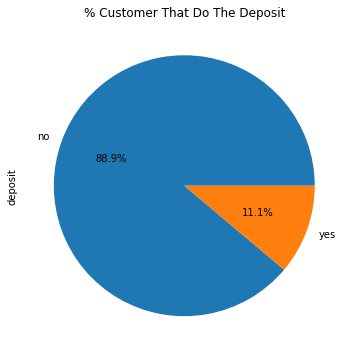

In [ ]:
f = plt.figure(figsize=(8,6)) 

plt.title('% Customer That Do The Deposit')
bmc_2['deposit'].value_counts().plot(kind = "pie", autopct='%1.1f%%')
plt.savefig('%deposit.png', dpi=80)

* We can see that up to 89% of Bank Customers didn't do the deposit and only 11% of customer do the deposit
* There is an unbalance group of customer that do the deposit and didn't do deposit

### **2. Customers that do the deposit mostly come from category Prime Working Age**

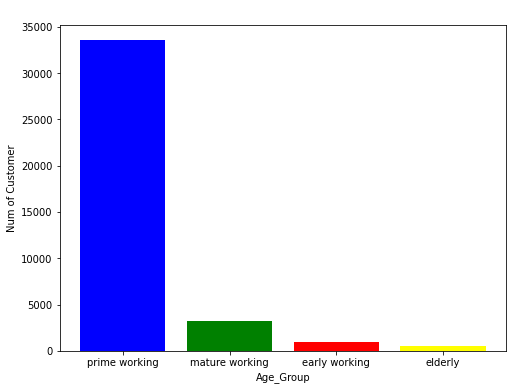

In [ ]:
x=['prime working','mature working', 'early working', 'elderly']
y=bmc_2['age_group'].value_counts()

plt.figure(figsize=(8,6))
plt.bar(x,y,color=['blue','green','red','yellow'])
plt.title('Barplot',size=15,color='white')
plt.xlabel('Age_Group')
plt.ylabel('Num of Customer')
plt.show()

The graph displays the distribution of Bank's customers. It can be seen that majority of the customers are classified as prime working age class.

In [ ]:
print('Deposit Outcome by Age Group (Max Value):')

def deposit_by_age_group():
    deposit_yes = bmc_2.loc[bmc_2.deposit == 'yes'].groupby(['age_group'])[['deposit']].count()
    deposit_yes.rename(columns={'deposit':'Deposit'}, inplace=True)

    deposit_no = bmc_2.loc[bmc_2.deposit == 'no'].groupby(['age_group'])[['deposit']].count()
    deposit_no.rename(columns={'deposit':'No Deposit'}, inplace=True)
    
    deposit_count = deposit_no + deposit_yes

    deposit_merge = pd.concat([deposit_yes, deposit_no], axis=1)
    deposit_merge

    deposit_merge.loc['Total'] = deposit_merge.sum(numeric_only=True, axis=0)
    deposit_merge['Total Count'] = deposit_merge['Deposit']+deposit_merge['No Deposit']
    deposit_merge['Deposits Rate (%)'] = round((deposit_merge['Deposit']/(deposit_merge['Deposit']+deposit_merge['No Deposit']))*100, 2)

    return deposit_merge.style.format('{:,.0f}')


deposit_by_age_group()

Deposit Outcome by Age Group (Max Value):


,Deposit,No Deposit,Total Count,Deposits Rate (%)
age_group,,,,
early working,204,727,931,22
prime working,"3,356","30,193","33,549",10
mature working,433,"2,755","3,188",14
elderly,265,312,577,46
Total,"4,258","33,987","38,245",11


* Most of bank customer come from prime working age category, which this category have age range between 25-54 yr old. And the deposit rate of this category is 10%.
* The second age category that have most deposit customer is the mature working category (55-64 yr old), with deposit rate about 14%
* From the viz, we can see that there is no children category (0-14 yr old) as bank customer. We know that the children category still don't have any job and depend on their parents for financial matters.


### **3. Job Variety of Customers**

In [ ]:
%%html
<div class='tableauPlaceholder' id='viz1656312008072' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ze&#47;Zeta-EDA&#47;DepositbyJobdash&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='Zeta-EDA&#47;DepositbyJobdash' /><param name='tabs' value='yes' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ze&#47;Zeta-EDA&#47;DepositbyJobdash&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1656312008072');                    var vizElement = divElement.getElementsByTagName('object')[0];                    if ( divElement.offsetWidth > 800 ) { vizElement.style.minWidth='800px';vizElement.style.maxWidth='100%';vizElement.style.minHeight='642px';vizElement.style.maxHeight=(divElement.offsetWidth*0.75)+'px';} else if ( divElement.offsetWidth > 500 ) { vizElement.style.minWidth='800px';vizElement.style.maxWidth='100%';vizElement.style.minHeight='642px';vizElement.style.maxHeight=(divElement.offsetWidth*0.75)+'px';} else { vizElement.style.width='100%';vizElement.style.minHeight='850px';vizElement.style.maxHeight=(divElement.offsetWidth*1.77)+'px';}                     var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

In [ ]:
print('Deposit Outcome by Job (Max Value):')

def deposit_by_job():    
    deposit_yes = bmc_2.loc[bmc_2.deposit == 'yes'].groupby(['job'])[['deposit']].count()
    deposit_yes.rename(columns={'deposit':'Deposit'}, inplace=True)

    deposit_no = bmc_2.loc[bmc_2.deposit == 'no'].groupby(['job'])[['deposit']].count()
    deposit_no.rename(columns={'deposit':'No Deposit'}, inplace=True)

    deposit_merge = pd.concat([deposit_yes, deposit_no], axis=1)
    deposit_merge
    
    deposit_merge.loc['Total'] = deposit_merge.sum(numeric_only=True, axis=0)
    deposit_merge['Total Count'] = deposit_merge['Deposit']+deposit_merge['No Deposit']
    deposit_merge['% of Deposits'] = round((deposit_merge['Deposit']/(deposit_merge['Deposit']+deposit_merge['No Deposit']))*100, 2)

    return deposit_merge.style.format('{:,.0f}')

deposit_by_job()

Deposit Outcome by Job (Max Value):


,Deposit,No Deposit,Total Count,% of Deposits
job,,,,
admin.,"1,283","8,654","9,937",13
blue-collar,595,"7,965","8,560",7
entrepreneur,116,"1,244","1,360",9
housemaid,98,889,987,10
management,304,"2,424","2,728",11
non-worker,528,"2,012","2,540",21
self-employed,146,"1,203","1,349",11
services,297,"3,419","3,716",8
student,208,480,688,30


* Mostly of the customer working as : admin, blue collar, technician, services & management (in order)
* The percentage of deposit customer from each job category are under 35%.

### **4. Mostly of the Customers are Married**

In [ ]:
%%html
<div class='tableauPlaceholder' id='viz1656312053982' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ze&#47;Zeta-EDA&#47;DepositbyMaritaldash&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='Zeta-EDA&#47;DepositbyMaritaldash' /><param name='tabs' value='yes' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ze&#47;Zeta-EDA&#47;DepositbyMaritaldash&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1656312053982');                    var vizElement = divElement.getElementsByTagName('object')[0];                    if ( divElement.offsetWidth > 800 ) { vizElement.style.minWidth='800px';vizElement.style.maxWidth='100%';vizElement.style.minHeight='642px';vizElement.style.maxHeight=(divElement.offsetWidth*0.75)+'px';} else if ( divElement.offsetWidth > 500 ) { vizElement.style.minWidth='800px';vizElement.style.maxWidth='100%';vizElement.style.minHeight='642px';vizElement.style.maxHeight=(divElement.offsetWidth*0.75)+'px';} else { vizElement.style.width='100%';vizElement.style.minHeight='850px';vizElement.style.maxHeight=(divElement.offsetWidth*1.77)+'px';}                     var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

In [ ]:
print('Deposit Outcome by Marital Status:')

def deposit_by_marital():    
    deposit_yes = bmc_2.loc[bmc_2.deposit == 'yes'].groupby(['marital'])[['deposit']].count()
    deposit_yes.rename(columns={'deposit':'Deposit'}, inplace=True)

    deposit_no = bmc_2.loc[bmc_2.deposit == 'no'].groupby(['marital'])[['deposit']].count()
    deposit_no.rename(columns={'deposit':'No Deposit'}, inplace=True)

    deposit_merge = pd.concat([deposit_yes, deposit_no], axis=1)
    deposit_merge
    
    deposit_merge.loc['Total'] = deposit_merge.sum(numeric_only=True, axis=0)
    deposit_merge['Total Count'] = deposit_merge['Deposit']+deposit_merge['No Deposit']
    deposit_merge['% of Deposits'] = round((deposit_merge['Deposit']/(deposit_merge['Deposit']+deposit_merge['No Deposit']))*100, 2)

    return deposit_merge.style.format('{:,.0f}')

deposit_by_marital()

Deposit Outcome by Marital Status:


,Deposit,No Deposit,Total Count,% of Deposits
marital,,,,
divorced,448,"3,854","4,302",10
married,"2,341","20,842","23,183",10
single,"1,469","9,291","10,760",14
Total,"4,258","33,987","38,245",11


* We can say that most of the bank customer are married (60% from total cust)
* From the married category, there just about 10% of customers that do the deposit. 
* From the viz, the single & divorce category have more % of deposit customer than the married category (single deposit : 13.65%, married deposit : 10.10%, divorced deposit : 10.41%)


### **5. Most of the Customers have Secondary Education**

In [ ]:
%%html
<div class='tableauPlaceholder' id='viz1656312083461' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ze&#47;Zeta-EDA&#47;DepositbyEducationdash&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='Zeta-EDA&#47;DepositbyEducationdash' /><param name='tabs' value='yes' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ze&#47;Zeta-EDA&#47;DepositbyEducationdash&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1656312083461');                    var vizElement = divElement.getElementsByTagName('object')[0];                    if ( divElement.offsetWidth > 800 ) { vizElement.style.minWidth='800px';vizElement.style.maxWidth='100%';vizElement.style.minHeight='642px';vizElement.style.maxHeight=(divElement.offsetWidth*0.75)+'px';} else if ( divElement.offsetWidth > 500 ) { vizElement.style.minWidth='800px';vizElement.style.maxWidth='100%';vizElement.style.minHeight='642px';vizElement.style.maxHeight=(divElement.offsetWidth*0.75)+'px';} else { vizElement.style.width='100%';vizElement.style.minHeight='850px';vizElement.style.maxHeight=(divElement.offsetWidth*1.77)+'px';}                     var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

In [ ]:
print('Deposit Outcome by education (Max Value):')

def deposit_by_education():    
    deposit_yes = bmc_2.loc[bmc_2.deposit == 'yes'].groupby(['education'])[['deposit']].count()
    deposit_yes.rename(columns={'deposit':'Deposit'}, inplace=True)

    deposit_no = bmc_2.loc[bmc_2.deposit == 'no'].groupby(['education'])[['deposit']].count()
    deposit_no.rename(columns={'deposit':'No Deposit'}, inplace=True)

    deposit_merge = pd.concat([deposit_yes, deposit_no], axis=1)
    deposit_merge
    
    deposit_merge.loc['Total'] = deposit_merge.sum(numeric_only=True, axis=0)
    deposit_merge['Total Count'] = deposit_merge['Deposit']+deposit_merge['No Deposit']    
    deposit_merge['% of Deposits'] = round((deposit_merge['Deposit']/(deposit_merge['Deposit']+deposit_merge['No Deposit']))*100, 2)

    return deposit_merge.style.format('{:,.0f}')

deposit_by_education()

Deposit Outcome by education (Max Value):


,Deposit,No Deposit,Total Count,% of Deposits
education,,,,
illiterate.basic.ed,"1,053","11,027","12,080",9
secondary.ed,"1,585","12,759","14,344",11
university.degree,"1,620","10,201","11,821",14
Total,"4,258","33,987","38,245",11


* Most customer have a Secondary Education level (around 40%), where customers from this category studied in high school & professional course 
* The others category (illiterate-basic & tertiary school) have almost same percentage (aourd 30%) of customer
* From the 40% of the customer in secondary education level , there are only 11% that do the deposit


### **6. Number of Customer Deposit by Loan & Housing Loan**

In [ ]:
%%html
<div class='tableauPlaceholder' id='viz1656312113441' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ze&#47;Zeta-EDA&#47;DepositbyLoanHousingLoan&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='Zeta-EDA&#47;DepositbyLoanHousingLoan' /><param name='tabs' value='yes' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ze&#47;Zeta-EDA&#47;DepositbyLoanHousingLoan&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1656312113441');                    var vizElement = divElement.getElementsByTagName('object')[0];                    if ( divElement.offsetWidth > 800 ) { vizElement.style.minWidth='800px';vizElement.style.maxWidth='100%';vizElement.style.minHeight='642px';vizElement.style.maxHeight=(divElement.offsetWidth*0.75)+'px';} else if ( divElement.offsetWidth > 500 ) { vizElement.style.minWidth='800px';vizElement.style.maxWidth='100%';vizElement.style.minHeight='642px';vizElement.style.maxHeight=(divElement.offsetWidth*0.75)+'px';} else { vizElement.style.width='100%';vizElement.style.minHeight='850px';vizElement.style.maxHeight=(divElement.offsetWidth*1.77)+'px';}                     var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

In [ ]:
print('Deposit Outcome by Loan (Max Value):')

def deposit_by_loan():    
    deposit_yes = bmc_2.loc[bmc_2.deposit == 'yes'].groupby(['loan'])[['deposit']].count()
    deposit_yes.rename(columns={'deposit':'Deposit'}, inplace=True)

    deposit_no = bmc_2.loc[bmc_2.deposit == 'no'].groupby(['loan'])[['deposit']].count()
    deposit_no.rename(columns={'deposit':'No Deposit'}, inplace=True)

    deposit_merge = pd.concat([deposit_yes, deposit_no], axis=1)
    deposit_merge

    max = deposit_merge.max()
    print(max)
    
    deposit_merge.loc['Total'] = deposit_merge.sum(numeric_only=True, axis=0)
    deposit_merge['Total Count'] = deposit_merge['Deposit']+deposit_merge['No Deposit']     
    deposit_merge['% of Deposits'] = round((deposit_merge['Deposit']/(deposit_merge['Deposit']+deposit_merge['No Deposit']))*100, 2)

    return deposit_merge.style.format('{:,.0f}')

deposit_by_loan()

Deposit Outcome by Loan (Max Value):
Deposit        3619
No Deposit    28667
dtype: int64


,Deposit,No Deposit,Total Count,% of Deposits
loan,,,,
no,"3,619","28,667","32,286",11
yes,639,"5,320","5,959",11
Total,"4,258","33,987","38,245",11


In [ ]:
print('Deposit Outcome by Housing_Loan (Max Value):')

def deposit_by_housing():    
    deposit_yes = bmc_2.loc[bmc_2.deposit == 'yes'].groupby(['housing'])[['deposit']].count()
    deposit_yes.rename(columns={'deposit':'Deposit'}, inplace=True)

    deposit_no = bmc_2.loc[bmc_2.deposit == 'no'].groupby(['housing'])[['deposit']].count()
    deposit_no.rename(columns={'deposit':'No Deposit'}, inplace=True)

    deposit_merge = pd.concat([deposit_yes, deposit_no], axis=1)
    deposit_merge

    max = deposit_merge.max()
    print(max)
    
    deposit_merge.loc['Total'] = deposit_merge.sum(numeric_only=True, axis=0)
    deposit_merge['Total Count'] = deposit_merge['Deposit']+deposit_merge['No Deposit']     
    deposit_merge['% of Deposits'] = round((deposit_merge['Deposit']/(deposit_merge['Deposit']+deposit_merge['No Deposit']))*100, 2)

    return deposit_merge.style.format('{:,.0f}')

deposit_by_housing()

Deposit Outcome by Housing_Loan (Max Value):
Deposit        2351
No Deposit    18227
dtype: int64


,Deposit,No Deposit,Total Count,% of Deposits
housing,,,,
no,"1,907","15,760","17,667",11
yes,"2,351","18,227","20,578",11
Total,"4,258","33,987","38,245",11


* Up to 88.79% bank customer that do the deposit didn't have any personal loan
* Up to 55% bank customer that do the deposit have housing loan
* There are 38.7% customer that do the deposit but dont have either personal loan & housing loan
* There are 46.29% customer that do the deposit and have housing loan but not personal loan
* If we do separate analysis between personal loan dan housing loan, we can see that :
1. The deposit rate are 11% for customer that have personal loan, and its the same % for customer that didn't have personal loan
2. The deposit rate are 11% for customer that have housing loan, and its the same % for customer that didn't have housing loan

### **7. Deposit Outcome by Call Response & Duration**

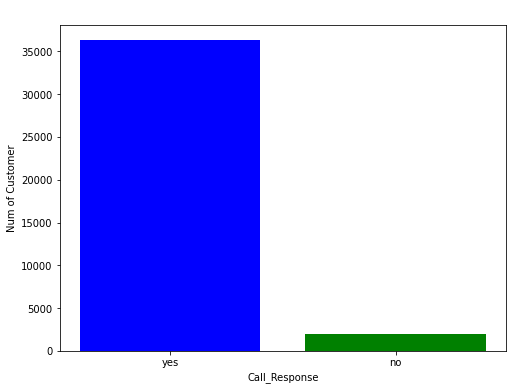

In [ ]:
x=bmc_2['call_response'].unique()
y=bmc_2['call_response'].value_counts()

plt.figure(figsize=(8,6))
plt.bar(x,y,color=['blue','green','red','yellow'])
plt.title('Barplot',size=15,color='white')
plt.xlabel('Call_Response')
plt.ylabel('Num of Customer')
plt.show()

In [ ]:
print('Deposit Outcome by Call_Response:')

def deposit_by_call_respond():
    deposit_yes = bmc_2.loc[bmc_2.deposit == 'yes'].groupby(['call_response'])[['deposit']].count()
    deposit_yes.rename(columns={'deposit':'Deposit'}, inplace=True)

    deposit_no = bmc_2.loc[bmc_2.deposit == 'no'].groupby(['call_response'])[['deposit']].count()
    deposit_no.rename(columns={'deposit':'No Deposit'}, inplace=True)
    
    deposit_count = deposit_no + deposit_yes

    deposit_merge = pd.concat([deposit_yes, deposit_no], axis=1)
    deposit_merge

    deposit_merge.loc['Total'] = deposit_merge.sum(numeric_only=True, axis=0)
    deposit_merge['Total Count'] = deposit_merge['Deposit']+deposit_merge['No Deposit']
    deposit_merge['Deposits Rate (%)'] = round((deposit_merge['Deposit']/(deposit_merge['Deposit']+deposit_merge['No Deposit']))*100, 2)

    return deposit_merge.style.format('{:,.0f}')


deposit_by_call_respond()

Deposit Outcome by Call_Response:


,Deposit,No Deposit,Total Count,Deposits Rate (%)
call_response,,,,
no,0,"1,953","1,953",0
yes,"4,258","32,034","36,292",12
Total,"4,258","33,987","38,245",11


* We can conclude that customer who didn't response (those who are didn't pickup the phone or ones who refuse to receive information) the call definitely didn't do the deposit (deposit rate = 0%)
* The customer that did response the call have a deposit rate about 12%

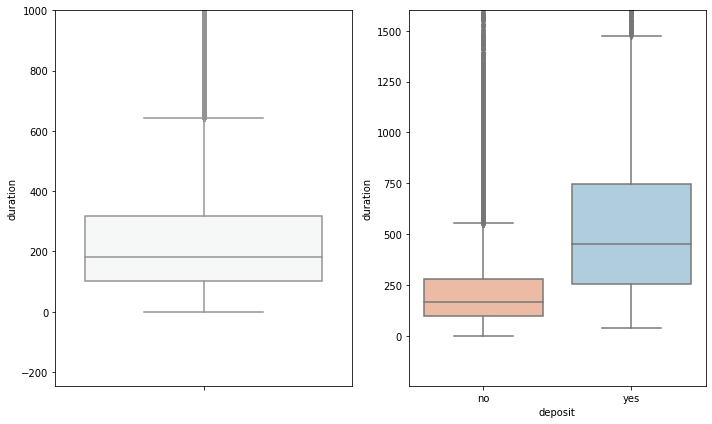

In [ ]:
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y="duration", data=bmc_2, palette="RdBu")
plt.ylim(top=1000)
plt.tight_layout()
plt.subplot(1, 2, 2)
sns.boxplot(x="deposit", y="duration", data=bmc_2, palette="RdBu")
plt.ylim(top=1600)
plt.tight_layout()

Based on duration variable it can be seen that customers that are not interested in deposit campaign spend less time (median < 4mins) on the phone. Meanwhile customers that prone to deposit spend longer time on the phone (median > 5mins)

### **8. Mostly of Success Customer recieved contact from marketing team around 1-6 calls**

In [ ]:
%%html
<div class='tableauPlaceholder' id='viz1656312221005' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ze&#47;Zeta-EDA&#47;DepositbyCampaignRepsdash&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='Zeta-EDA&#47;DepositbyCampaignRepsdash' /><param name='tabs' value='yes' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ze&#47;Zeta-EDA&#47;DepositbyCampaignRepsdash&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1656312221005');                    var vizElement = divElement.getElementsByTagName('object')[0];                    if ( divElement.offsetWidth > 800 ) { vizElement.style.minWidth='800px';vizElement.style.maxWidth='100%';vizElement.style.minHeight='642px';vizElement.style.maxHeight=(divElement.offsetWidth*0.75)+'px';} else if ( divElement.offsetWidth > 500 ) { vizElement.style.minWidth='800px';vizElement.style.maxWidth='100%';vizElement.style.minHeight='642px';vizElement.style.maxHeight=(divElement.offsetWidth*0.75)+'px';} else { vizElement.style.width='100%';vizElement.style.minHeight='850px';vizElement.style.maxHeight=(divElement.offsetWidth*1.77)+'px';}                     var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

In [ ]:
print('Deposit Outcome by campaign (Max Value):')

def deposit_by_campaign():    

    deposit_yes = bmc_2.loc[bmc_2.deposit == 'yes'].groupby(['campaign_reps'])[['deposit']].count()
    deposit_yes.rename(columns={'deposit':'Deposit'}, inplace=True)

    deposit_no = bmc_2.loc[bmc_2.deposit == 'no'].groupby(['campaign_reps'])[['deposit']].count()
    deposit_no.rename(columns={'deposit':'No Deposit'}, inplace=True)

    deposit_merge = pd.concat([deposit_yes, deposit_no], axis=1)
    deposit_merge

    max = deposit_merge.max()
    print(max)
    
    deposit_merge.loc['Total'] = deposit_merge.sum(numeric_only=True, axis=0)
    deposit_merge['Total Count'] = deposit_merge['Deposit']+deposit_merge['No Deposit'] 
    deposit_merge['% of Deposits'] = round((deposit_merge['Deposit']/(deposit_merge['Deposit']+deposit_merge['No Deposit']))*100, 2)

    return deposit_merge.style.format('{:,.0f}')

deposit_by_campaign()

Deposit Outcome by campaign (Max Value):
Deposit        4158
No Deposit    31867
dtype: int64


,Deposit,No Deposit,Total Count,% of Deposits
campaign_reps,,,,
1-6,"4,158","31,867","36,025",12
7-12,92,"1,610","1,702",5
13-18,7,310,317,2
19-24,1,119,120,1
25+,0,81,81,0
Total,"4,258","33,987","38,245",11


* Number of contacts that bank marketing team done to customer is vary between 1 up to 43 times
* It seems that the customer tend to do the deposit with the lowest contact from bank marketing team (1-6 calls), it shows by the percentage of the deposit customer around 11.54% do the deposit
* We can say that , the more marketing team contact the customer the least customer do the deposit

### **9. Contact Tracing by Previous Campaign (Repetition)**

In [ ]:
%%html
<div class='tableauPlaceholder' id='viz1656312343929' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ze&#47;Zeta-EDA&#47;DepositFollowingPreviousCampaign&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='Zeta-EDA&#47;DepositFollowingPreviousCampaign' /><param name='tabs' value='yes' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ze&#47;Zeta-EDA&#47;DepositFollowingPreviousCampaign&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1656312343929');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

In [ ]:
print('Deposit Outcome by Contact Reps of Previous Campaign:')

def deposit_by_previous():
    deposit_yes = bmc_2.loc[bmc_2.deposit == 'yes'].groupby(['previous'])[['deposit']].count()
    deposit_yes.rename(columns={'deposit':'Deposit'}, inplace=True)

    deposit_no = bmc_2.loc[bmc_2.deposit == 'no'].groupby(['previous'])[['deposit']].count()
    deposit_no.rename(columns={'deposit':'No Deposit'}, inplace=True)
    
    deposit_count = deposit_no + deposit_yes

    deposit_merge = pd.concat([deposit_yes, deposit_no], axis=1)
    deposit_merge

    deposit_merge.loc['Total'] = deposit_merge.sum(numeric_only=True, axis=0)
    deposit_merge['Total Count'] = deposit_merge['Deposit']+deposit_merge['No Deposit']
    deposit_merge['Deposits Rate (%)'] = round((deposit_merge['Deposit']/(deposit_merge['Deposit']+deposit_merge['No Deposit']))*100, 2)

    return deposit_merge.style.format('{:,.0f}')


deposit_by_previous()

Deposit Outcome by Contact Reps of Previous Campaign:


,Deposit,No Deposit,Total Count,Deposits Rate (%)
previous,,,,
0,"2,922","30,144","33,066",9
1,870,"3,364","4,234",21
2,306,366,672,46
3,117,78,195,60
4,30,27,57,53
5,11,5,16,69
6,2,2,4,50
7,nan,1,nan,nan
Total,"4,258","33,987","38,245",11


* From the viz we can see that up to 9 % of the customer do the deposit when they didn't get contact on the previous campaign.
* The chart also displays that the more customers get contacted on previous campaign the higher the deposit rate. Thers is a possibility that the customers get more familiar with the promoted banking products.
* We can see the more customer get contact in the previous campaign the least customer do the deposit

### **10. Deposit Outcome by Previous Campaign**

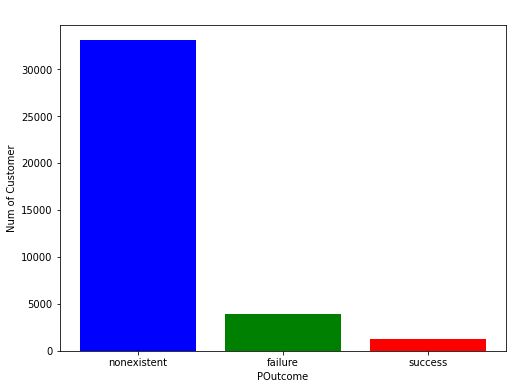

In [ ]:
x=bmc_2['poutcome'].unique()
y=bmc_2['poutcome'].value_counts()

plt.figure(figsize=(8,6))
plt.bar(x,y,color=['blue','green','red','yellow'])
plt.title('Barplot',size=15,color='white')
plt.xlabel('POutcome')
plt.ylabel('Num of Customer')
plt.show()

In [ ]:
print('Deposit Outcome by Previous_Outcome (Max Value):')

def deposit_by_poutcome():    
    deposit_yes = bmc_2.loc[bmc_2.deposit == 'yes'].groupby(['poutcome'])[['deposit']].count()
    deposit_yes.rename(columns={'deposit':'Deposit'}, inplace=True)

    deposit_no = bmc_2.loc[bmc_2.deposit == 'no'].groupby(['poutcome'])[['deposit']].count()
    deposit_no.rename(columns={'deposit':'No Deposit'}, inplace=True)

    deposit_merge = pd.concat([deposit_yes, deposit_no], axis=1)
    deposit_merge

    max = deposit_merge.max()
    print(max)
    
    deposit_merge.loc['Total'] = deposit_merge.sum(numeric_only=True, axis=0)
    deposit_merge['Total Count'] = deposit_merge['Deposit']+deposit_merge['No Deposit']     
    deposit_merge['% of Deposits'] = round((deposit_merge['Deposit']/(deposit_merge['Deposit']+deposit_merge['No Deposit']))*100, 2)

    return deposit_merge.style.format('{:,.0f}')

deposit_by_poutcome()

Deposit Outcome by Previous_Outcome (Max Value):
Deposit        2922
No Deposit    30144
dtype: int64


,Deposit,No Deposit,Total Count,% of Deposits
poutcome,,,,
failure,533,"3,403","3,936",14
nonexistent,"2,922","30,144","33,066",9
success,803,440,"1,243",65
Total,"4,258","33,987","38,245",11


* We can see that mostly of the customer didn't join the previous campaign, there are about 86% of the total customer that include in the nonexistent category
* But, if we look the deposit rate of each category, we can say that customer who join previous campaign most likely do the deposit in this campaign 
* An intriguing finding is that even if the prior contact fails, there is still a probability that the consumer would subscribe to the term deposit.

Text(0.5, 1.0, 'Subscribed')

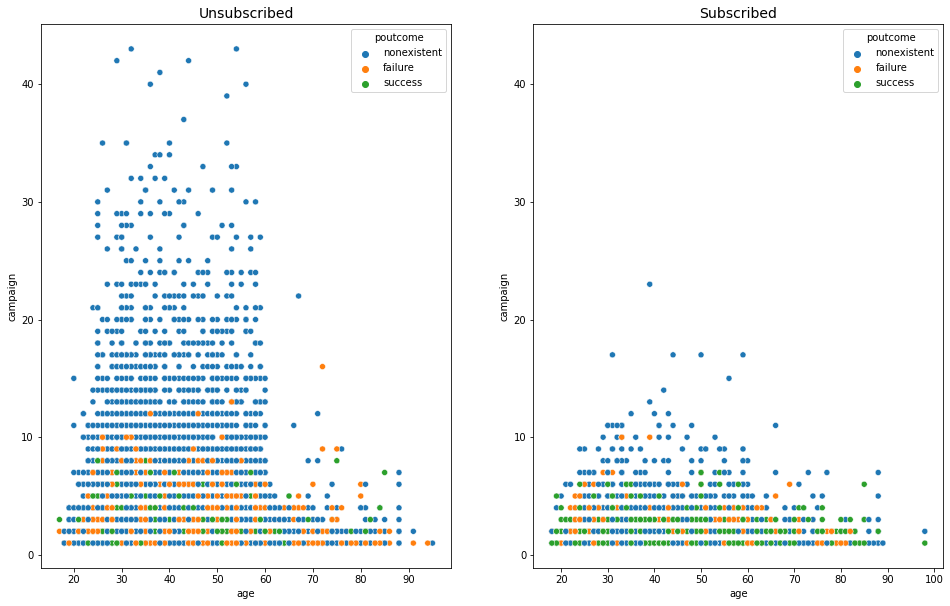

In [ ]:
plt.figure(figsize=(25, 10))
ax1 = plt.subplot(1, 3, 1)
sns.scatterplot(x='age', y='campaign', hue='poutcome', data=bmc_2[(bmc_2['deposit']=='no') & (bmc_2['poutcome'])])
plt.title("Unsubscribed", fontsize=14)
plt.subplot(1, 3, 2, sharey=ax1)
sns.scatterplot(x='age', y='campaign', hue='poutcome', data=bmc_2[(bmc_2['deposit']=='yes') & (bmc_2['poutcome'])])
plt.title("Subscribed", fontsize=14)

* The figure above clearly demonstrates the significance of the previous contact's outcome. More green dots on the right side of the chart indicate that the prior interaction with consumers who have enrolled to deposit was generally successful. 
* On the left side, consumers who have not subscribed to the deposit and whose prior interaction with the ended in failure are represented. 
* It can be seen that on unsubscribe category that most of non-existent customers range between age 25-54 (prime working age group). They are bombarded with campaign phone call by Bank's marketing which can be the reason of disinterest but instead annoyed by the calls.

### **11. Deposit Outcome by The Last Time The Customer Was Contacted (Weeks)**

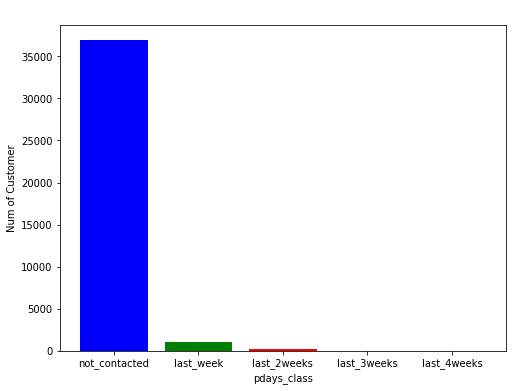

In [ ]:
x=bmc_2['pdays_class'].unique()
y=bmc_2['pdays_class'].value_counts()

plt.figure(figsize=(8,6))
plt.bar(x,y,color=['blue','green','red','yellow'])
plt.title('Barplot',size=15,color='white')
plt.xlabel('pdays_class')
plt.ylabel('Num of Customer')
plt.show()

In [ ]:
print('Deposit Outcome by The Last Time The Customer Was Contacted (Weeks):')

def deposit_by_pdays_class():
    deposit_yes = bmc_2.loc[bmc_2.deposit == 'yes'].groupby(['pdays_class'])[['deposit']].count()
    deposit_yes.rename(columns={'deposit':'Deposit'}, inplace=True)

    deposit_no = bmc_2.loc[bmc_2.deposit == 'no'].groupby(['pdays_class'])[['deposit']].count()
    deposit_no.rename(columns={'deposit':'No Deposit'}, inplace=True)
    
    deposit_count = deposit_no + deposit_yes

    deposit_merge = pd.concat([deposit_yes, deposit_no], axis=1)
    deposit_merge

    deposit_merge.loc['Total'] = deposit_merge.sum(numeric_only=True, axis=0)
    deposit_merge['Total Count'] = deposit_merge['Deposit']+deposit_merge['No Deposit']
    deposit_merge['Deposits Rate (%)'] = round((deposit_merge['Deposit']/(deposit_merge['Deposit']+deposit_merge['No Deposit']))*100, 2)

    return deposit_merge.style.format('{:,.0f}')


deposit_by_pdays_class()

Deposit Outcome by The Last Time The Customer Was Contacted (Weeks):


,Deposit,No Deposit,Total Count,Deposits Rate (%)
pdays_class,,,,
last_week,697,374,"1,071",65
last_2weeks,136,107,243,56
last_3weeks,27,19,46,59
last_4weeks,5,1,6,83
not_contacted,"3,393","33,486","36,879",9
Total,"4,258","33,987","38,245",11


* Mostly of the customer who do the deposit didn't get contacted by the marketing on the previously week
* The customer that got contacted by the marketing team on the previous week has % rate deposit about 65%

In [ ]:
print('Deposit Outcome by Contacted on Previous Campaign (Max Value):')

def deposit_by_previous():    
    deposit_yes = bmc_2.loc[bmc_2.deposit == 'yes'].groupby(['previous'])[['deposit']].count()
    deposit_yes.rename(columns={'deposit':'Deposit'}, inplace=True)

    deposit_no = bmc_2.loc[bmc_2.deposit == 'no'].groupby(['previous'])[['deposit']].count()
    deposit_no.rename(columns={'deposit':'No Deposit'}, inplace=True)

    deposit_merge = pd.concat([deposit_yes, deposit_no], axis=1)
    deposit_merge

    max = deposit_merge.max()
    print(max)
    
    deposit_merge.loc['Total'] = deposit_merge.sum(numeric_only=True, axis=0)
    deposit_merge['Total Count'] = deposit_merge['Deposit'] + deposit_merge['No Deposit'] 
    deposit_merge['% of Deposits'] = round((deposit_merge['Deposit']/(deposit_merge['Deposit']+deposit_merge['No Deposit']))*100, 2)

    return deposit_merge.style.format('{:,.0f}')

deposit_by_previous()

Deposit Outcome by Contacted on Previous Campaign (Max Value):
Deposit        2922.0
No Deposit    30144.0
dtype: float64


,Deposit,No Deposit,Total Count,% of Deposits
previous,,,,
0,"2,922","30,144","33,066",9
1,870,"3,364","4,234",21
2,306,366,672,46
3,117,78,195,60
4,30,27,57,53
5,11,5,16,69
6,2,2,4,50
7,nan,1,nan,nan
Total,"4,258","33,987","38,245",11


### **12. Number of Contact Done per Month & Days**

In [ ]:
%%html
<div class='tableauPlaceholder' id='viz1656312542673' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ze&#47;Zeta-EDA&#47;Depositbymonthweek&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='Zeta-EDA&#47;Depositbymonthweek' /><param name='tabs' value='yes' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ze&#47;Zeta-EDA&#47;Depositbymonthweek&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1656312542673');                    var vizElement = divElement.getElementsByTagName('object')[0];                    if ( divElement.offsetWidth > 800 ) { vizElement.style.minWidth='800px';vizElement.style.maxWidth='100%';vizElement.style.minHeight='642px';vizElement.style.maxHeight=(divElement.offsetWidth*0.75)+'px';} else if ( divElement.offsetWidth > 500 ) { vizElement.style.minWidth='800px';vizElement.style.maxWidth='100%';vizElement.style.minHeight='642px';vizElement.style.maxHeight=(divElement.offsetWidth*0.75)+'px';} else { vizElement.style.width='100%';vizElement.style.minHeight='850px';vizElement.style.maxHeight=(divElement.offsetWidth*1.77)+'px';}                     var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

* The most contact occured in May, with % call response about 94.25%. This align with the % deposit (most % deposit occured in the May)
* We can see, most contact occured in the month May, Jun, Aug, Jun, Nov
* The least contact occured in the months : Dec, Mar, Sep, Oct
* If we break call response by days , we get that the most contact occured in Thursday, with % call response 94.26%. This align with the % deposit (most % deposit occured in the Thu)

### **13. Correlation between Variable (Categorical & Nominal)**

In [ ]:
# # !pip install dython
# # Change data with category type to object to do the correlation with dython
# bmc_sem=bmc_2.copy()
# for col in ['age_group', 'campaign_reps', 'call_response', 'pdays_class']:
#     bmc_sem[col] = bmc_sem[col].astype('object')

# # Correlation categorical & nominal with dython
# complete_correlation= associations(bmc_sem, figsize=(10,10))
# df_complete_corr=complete_correlation['corr']
# df_complete_corr.dropna(axis=1, how='all').dropna(axis=0, how='all').style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)

In [ ]:
bmc_2a = bmc_2.copy()

for col in ['age_group', 'campaign_reps', 'call_response', 'pdays_class']:
    bmc_2a[col] = bmc_2a[col].astype('object')

features = list(bmc_2a.columns)
cat_attrs = [ col for col in features if bmc_2a[col].dtype=='O']
cat_attrs

label_enc = LabelEncoder()

for cat in cat_attrs:
    bmc_2a[cat] = label_enc.fit_transform(bmc_2a[cat])

bmc_2a.head()

,age,job,marital,education,default,housing,loan,contact,month,day,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,deposit,age_group,campaign_reps,call_response,pdays_class
0,56,3,1,0,0,0,0,1,6,1,261,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0,2,0,1,4
1,57,7,1,1,2,0,0,1,6,1,149,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0,2,0,1,4
2,37,7,1,1,0,1,0,1,6,1,226,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0,3,0,1,4
3,40,0,1,0,0,0,0,1,6,1,151,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0,3,0,1,4
4,56,7,1,1,0,0,1,1,6,1,307,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0,2,0,1,4


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


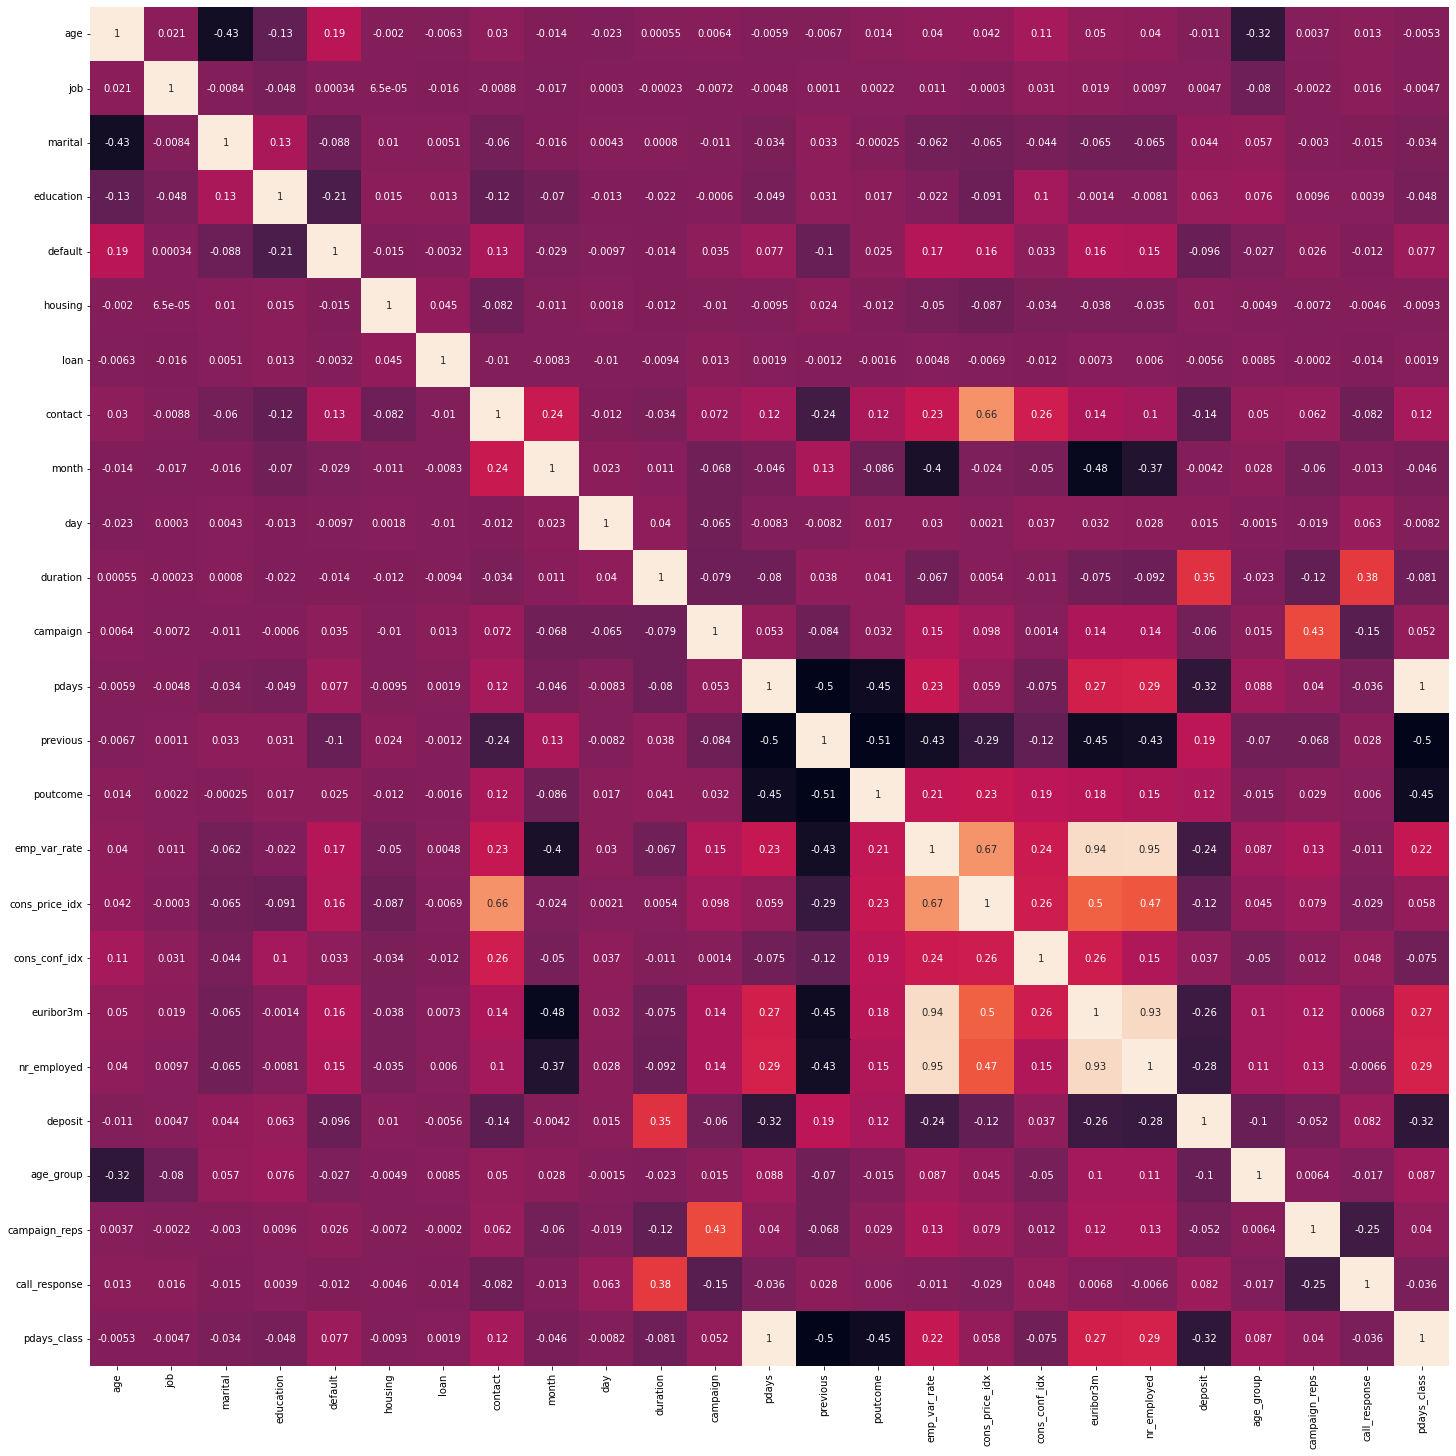

In [ ]:
corr_matrix = bmc_2a.corr(method='spearman')

plt.figure(figsize=(25, 25))
sns.heatmap(corr_matrix, mask=np.zeros_like(corr_matrix, dtype=np.bool), square=True, annot=True, cbar=False)

**Degree of Correlation by Statisticsolutions.com**
<br> Strong : 0.50 - 1.00
<br> Medium : 0.30 - 0.49
<br> Small : < + .29

* All of variable have correlation with deposit varible, but the degree correlation are vary from small to medium (there are no variable that have a strong correlation with deposit).
* Variables that have medium correlation with deposit are : duration (+),pday_class (-)
* Duration have (+) correlation, this means that if this variable increase, the deposit variable tend to increase.  There are also a (+) correlation between num of previous campaign with deposit (small corr.)
* Pday_class have (-) correlation, this means that if this variable increase, the deposit variable tend to decrease. There are also a (-) correlation between campaign_reps with deposit (small corr.)

---
# **Data Processing**
---

## **Reducing Redundant Data and Defining Relevant Data Dicretization**

Taking a closer look, we see that some of the following characteristics have little bearing on the effectiveness of the marketing effort: 
- The `default` variables: It is related to binary credit in default categories and has too many unknown data (20% of all data) to be dropped. Meanwhile, the data of this variable are imbalance where 3 data as non-default and the rest are default. Instead of removing samples, this variable will be excluded for further processing.
- The `contact` variable is deleted since the contact method (cellular, telephone, and unknown) provides no useful information. 
- The `duration` variable will be excluded from modeling process since we are intending to predict the potential customer prior the calling.

On the other hand, the new variable that created (`campaign_reps`, `pdays_class` & `age_group` as in categorical variable) will be utilized to replace `campaign`, `pdays`, and `age` which was numerical variable. To help achieve this aim, the following important columns are included in a new subset.

In [ ]:
bmc_2.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx',
       'euribor3m', 'nr_employed', 'deposit', 'age_group', 'campaign_reps',
       'call_response', 'pdays_class'],
      dtype='object')

In [ ]:
select_cols = ['age_group', 'job', 'marital', 'education', 'housing', 'loan', 'month', 'day','campaign_reps', 'pdays_class',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'deposit']

bmc_3 = bmc_2[select_cols]
bmc_3.sample(5)

,age_group,job,marital,education,housing,loan,month,day,campaign_reps,pdays_class,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,deposit
19878,prime working,technician,married,university.degree,yes,no,aug,fri,1-6,not_contacted,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
39293,prime working,technician,single,secondary.ed,yes,no,mar,tue,1-6,not_contacted,0,nonexistent,-1.8,93.369,-34.8,0.646,5008.7,no
31139,prime working,admin.,single,university.degree,yes,no,may,wed,1-6,not_contacted,0,nonexistent,-1.8,92.893,-46.2,1.334,5099.1,yes
11982,prime working,blue-collar,divorced,illiterate.basic.ed,no,no,jun,wed,1-6,not_contacted,0,nonexistent,1.4,94.465,-41.8,4.958,5228.1,no
36353,prime working,admin.,married,university.degree,no,no,jun,tue,1-6,not_contacted,0,nonexistent,-2.9,92.963,-40.8,1.262,5076.2,yes


In [ ]:
bmc_3.describe(include=['category', 'object'])

,age_group,job,marital,education,housing,loan,month,day,campaign_reps,pdays_class,poutcome,deposit
count,38245,38245,38245,38245,38245,38245,38245,38245,38245,38245,38245,38245
unique,4,10,3,3,2,2,10,5,5,5,3,2
top,prime working,admin.,married,secondary.ed,yes,no,may,thu,1-6,not_contacted,nonexistent,no
freq,33549,9937,23183,14344,20578,32286,12794,8011,36025,36879,33066,33987


In [ ]:
bmc_3['deposit'] = bmc_3['deposit'].replace(to_replace=['no','yes'], value=[0, 1])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


## **Pre-Processing**

In this stage we apply feature encoding for all categorical features in dataset. We use Binary Encoding for `month` and `day`. Since the rest categorical features will be encoded with One-Hot Encoding and the remainder will be passed through.

In [ ]:
transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first'), ['age_group', 'job', 'marital', 'education', 'housing', 'loan','campaign_reps', 'pdays_class', 'poutcome']),
    ('binary', ce.BinaryEncoder(), ['month', 'day'])
], remainder='passthrough')

In [ ]:
x = bmc_3.drop(columns=['deposit'])
y = bmc_3['deposit']

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x, y, stratify=y, test_size=0.2, random_state = 2022)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((30596, 17), (7649, 17), (30596,), (7649,))

In [ ]:
X_train_transformed = transformer.fit_transform(x_train)
X_test_transformed = transformer.transform(x_test)

In [ ]:
feature = pd.DataFrame(X_train_transformed,columns=transformer.get_feature_names())
feature_columns = list(feature.columns)
feature_columns

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['onehot__x0_elderly',
 'onehot__x0_mature working',
 'onehot__x0_prime working',
 'onehot__x1_blue-collar',
 'onehot__x1_entrepreneur',
 'onehot__x1_housemaid',
 'onehot__x1_management',
 'onehot__x1_non-worker',
 'onehot__x1_self-employed',
 'onehot__x1_services',
 'onehot__x1_student',
 'onehot__x1_technician',
 'onehot__x2_married',
 'onehot__x2_single',
 'onehot__x3_secondary.ed',
 'onehot__x3_university.degree',
 'onehot__x4_yes',
 'onehot__x5_yes',
 'onehot__x6_13-18',
 'onehot__x6_19-24',
 'onehot__x6_25+',
 'onehot__x6_7-12',
 'onehot__x7_last_3weeks',
 'onehot__x7_last_4weeks',
 'onehot__x7_last_week',
 'onehot__x7_not_contacted',
 'onehot__x8_nonexistent',
 'onehot__x8_success',
 'binary__month_0',
 'binary__month_1',
 'binary__month_2',
 'binary__month_3',
 'binary__day_0',
 'binary__day_1',
 'binary__day_2',
 'previous',
 'emp_var_rate',
 'cons_price_idx',
 'cons_conf_idx',
 'euribor3m',
 'nr_employed']


## **Modeling**


In [ ]:
logreg = LogisticRegression(random_state= 2022)
dt     = DecisionTreeClassifier(random_state= 2022)
rf     = RandomForestClassifier(random_state= 2022)
xgb    = XGBClassifier(random_state= 2022)

skfold=StratifiedKFold(n_splits=5, random_state= 2022, shuffle=True)

### Model Benchmarking : Cross Validation K-Fold

In [ ]:
models =[logreg,dt,rf,xgb]
score  =[]
avg    =[]
std    =[]

for i in models:
    estimator = Pipeline([
                        ('preprocess',transformer),
                        ('model',i)])
    
    model_cv  = cross_val_score(estimator,
                                x_train,
                                y_train,
                                cv = skfold,
                                scoring = 'roc_auc')
    
    score.append(model_cv.round(3))
    avg.append(model_cv.mean())
    std.append(model_cv.std())

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [ ]:
# Cross Validation ROC_AUC Score Train Set

benchmark_train_res = pd.DataFrame({
    'Model'        :['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost'],
    'CV Score ROC_AUC':score, 'Mean ROC_AUC':avg,'SDev':std}
    ).set_index('Model').sort_values(by='Mean ROC_AUC',ascending=False)

benchmark_train_res

,CV Score ROC_AUC,Mean ROC_AUC,SDev
Model,,,
XGBoost,"[0.808, 0.797, 0.793, 0.796, 0.784]",0.795521,0.007763
Logistic Regression,"[0.788, 0.775, 0.775, 0.768, 0.77]",0.775084,0.006964
Random Forest,"[0.744, 0.754, 0.757, 0.749, 0.745]",0.749982,0.004970
Decision Tree,"[0.62, 0.622, 0.619, 0.621, 0.595]",0.615219,0.009985


### Model Benchmarking : Test Data

In [ ]:
models = [logreg,dt,rf,xgb]
score_roc_auc = []

def y_pred_func(i):
    estimator=Pipeline([
        ('preprocess',transformer),
        ('model',i)])
    x_train,x_test
    
    estimator.fit(x_train,y_train)
    return(estimator,estimator.predict(x_test),x_test)

for i,j in zip(models, ['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost']):
    estimator,y_pred,x_test = y_pred_func(i)
    y_predict = estimator.predict(x_test)
    score_roc_auc.append(roc_auc_score(y_test,y_predict))
    
benchmark_test_res = pd.DataFrame({'Model':['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost'],
             'ROC_AUC Score':score_roc_auc}).set_index('Model').sort_values(by='ROC_AUC Score',ascending=False)

benchmark_test_res

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


,ROC_AUC Score
Model,
Random Forest,0.633011
Decision Tree,0.629247
XGBoost,0.614783
Logistic Regression,0.573347


### Comparison

In [ ]:
# Train - Test Comparison
print('Benchmark Train Set')
print(benchmark_train_res)

print('\n\nBenchmark Test Set')
print(benchmark_test_res)

Benchmark Train Set
                                        CV Score ROC_AUC  Mean ROC_AUC  \
Model                                                                    
XGBoost              [0.808, 0.797, 0.793, 0.796, 0.784]      0.795521   
Logistic Regression   [0.788, 0.775, 0.775, 0.768, 0.77]      0.775084   
Random Forest        [0.744, 0.754, 0.757, 0.749, 0.745]      0.749982   
Decision Tree         [0.62, 0.622, 0.619, 0.621, 0.595]      0.615219   

                         SDev  
Model                          
XGBoost              0.007763  
Logistic Regression  0.006964  
Random Forest        0.004970  
Decision Tree        0.009985  


Benchmark Test Set
                     ROC_AUC Score
Model                             
Random Forest             0.633011
Decision Tree             0.629247
XGBoost                   0.614783
Logistic Regression       0.573347


Between 4 models candidate, XGBoost, LogReg, and Random Forest have relatively similar ROC_AUC score. Nevertheless, Random Forest has the lowest deviation score (0.004) compared to others.

Based on the benchmark result, XGBoost has the highest mean cross validation score approximately around 79%. However, Random Forest has the highest ROC-AUC score on test set 63%. Therefore, Random Forest will be used for further processing according test set score. 

In [ ]:
estimator_rf = Pipeline([
                       ('preprocess',transformer),
                       ('model',rf)])

estimator_rf.fit(x_train, y_train)
y_predict_rf = estimator_rf.predict(x_test)

In [ ]:
print(confusion_matrix(y_test, y_predict_rf))
print('Random Forest ROC-AUC Score : ',round(roc_auc_score(y_test, y_predict_rf),4)*100,'%')

rf_cv = (cross_val_score(estimator_rf,x_train,y_train,cv=skfold,scoring='roc_auc').mean())
print('Random Forest CV Mean Score : ',round(rf_cv, 3))

[[6515  282]
 [ 590  262]]
Random Forest ROC-AUC Score :  63.3 %
Random Forest CV Mean Score :  0.75


## **Imbalance Treatment**


In [ ]:
bmc_3['deposit'].value_counts()/bmc_3.shape[0]*100

0    88.866518
1    11.133482
Name: deposit, dtype: float64

Since the target (`deposit`) consists of yes (11%) and no (88%), it indicates imbalance data. It will affects on model's prediction. Moreover, we want to surpress the False Positive prediction as it can damaging the Bank's profit on deposits. Therefore, imbalance treatment will be applied. This project will implement Random Over Sampling and Random Under Sampling for imbalance treatment based on Random Forest model as it has the highest benchmark score.

### Test Oversampling with K-Fold Cross Validation

In [ ]:
def calc_train_error(x_train, y_train, model):
#     '''returns in-sample error for already fit model.'''
    predictions = model.predict(x_train)
    roc_auc = roc_auc_score(y_train, predictions)
    return { 
        'roc': roc_auc, 
    }
    
def calc_validation_error(x_test, y_test, model):
#     '''returns out-of-sample error for already fit model.'''
    predictions = model.predict(x_test)
    roc_auc = roc_auc_score(y_test, predictions)
    return { 
        'roc': roc_auc, 
    }
    
def calc_metrics(x_train, y_train, x_test, y_test, model):
#     '''fits model and returns the in-sample error and out-of-sample error'''
    model.fit(x_train, y_train)
    train_error = calc_train_error(x_train, y_train, model)
    validation_error = calc_validation_error(x_test, y_test, model)
    return train_error, validation_error

In [ ]:
data = x_train
target = y_train

In [ ]:
train_errors_without_oversampling = []
validation_errors_without_oversampling = []

train_errors_with_oversampling = []
validation_errors_with_oversampling = []

train_errors_with_undersampling = []
validation_errors_with_undersampling = []

train_errors_with_smote = []
validation_errors_with_smote = []

# print(len(x_val), (len(x_train) + len(x_val)))
ros = RandomOverSampler(random_state=2022)
rus = RandomUnderSampler(random_state=2022)

    
for train_index, val_index in skfold.split(data, target):
    
    # split data
    x_train, x_val = data.iloc[train_index], data.iloc[val_index]
    y_train, y_val = target.iloc[train_index], target.iloc[val_index]

    X_ros, Y_ros = ros.fit_resample(x_train, y_train)
    X_rus, Y_rus = rus.fit_resample(x_train, y_train)

    # instantiate model ros
    estimator_ros = Pipeline([
        ('preprocess',transformer),
        ('balancing',ros),
        ('model',rf)])

    # instantiate model rus
    estimator_rus = Pipeline([
        ('preprocess',transformer),
        ('balancing',rus),
        ('model',rf)])

    #calculate errors
    train_error_without_oversampling, val_error_without_oversampling = calc_metrics(x_train, y_train, x_val, y_val, estimator_rf)
    train_error_with_oversampling, val_error_with_oversampling = calc_metrics(X_ros, Y_ros, x_val, y_val, estimator_ros)
    train_error_with_undersampling, val_error_with_undersampling = calc_metrics(X_rus, Y_rus, x_val, y_val, estimator_rus)

    # append to appropriate list
    train_errors_without_oversampling.append(train_error_without_oversampling)
    validation_errors_without_oversampling.append(val_error_without_oversampling)
    
    train_errors_with_oversampling.append(train_error_with_oversampling)
    validation_errors_with_oversampling.append(val_error_with_oversampling)

    train_errors_with_undersampling.append(train_error_with_undersampling)
    validation_errors_with_undersampling.append(val_error_with_undersampling)


#### Evaluation Metrics With No Treatment

In [ ]:
listItem_notreat = []

for tr,val in zip(train_errors_without_oversampling,validation_errors_without_oversampling) :
    listItem_notreat.append([tr['roc'],val['roc']])

listItem_notreat.append(list(np.mean(listItem_notreat,axis=0)))
listItem_notreat.append(list(np.std(listItem_notreat,axis=0)))
    
dfEvaluate_notreat = pd.DataFrame(listItem_notreat, 
                     columns=['Train ROC AUC', 
                              'Test ROC AUC', 
                             ])

listIndex = list(dfEvaluate_notreat.index)
listIndex[-2] = 'Average'
listIndex[-1] = 'Std'
dfEvaluate_notreat.index = listIndex
dfEvaluate_notreat

,Train ROC AUC,Test ROC AUC
0,0.855746,0.618427
1,0.856533,0.625609
2,0.856715,0.630838
3,0.851739,0.628820
4,0.854812,0.611748
Average,0.855109,0.623088
Std,0.001656,0.006450


#### Evaluation Metrics With Oversampling

In [ ]:
listItem_ros = []

for tr,val in zip(train_errors_with_oversampling,validation_errors_with_oversampling) :
    listItem_ros.append([tr['roc'],val['roc']])

listItem_ros.append(list(np.mean(listItem_ros,axis=0)))
listItem_ros.append(list(np.std(listItem_ros,axis=0)))
    
dfEvaluate_ros = pd.DataFrame(listItem_ros, 
                    columns=[
                            'Train ROC AUC', 
                            'Test ROC AUC', 
                            ])

listIndex = list(dfEvaluate_ros.index)
listIndex[-2] = 'Average'
listIndex[-1] = 'Std'
dfEvaluate_ros.index = listIndex
dfEvaluate_ros

,Train ROC AUC,Test ROC AUC
0,0.939661,0.633467
1,0.939592,0.647729
2,0.938465,0.636987
3,0.937638,0.640746
4,0.937270,0.635158
Average,0.938525,0.638817
Std,0.000894,0.004628


In [ ]:
estimator_ros.fit(X_ros, Y_ros)
y_predict_ros = estimator_ros.predict(x_test)

In [ ]:
print(confusion_matrix(y_test, y_predict_ros))
print('Random Forest_ROS ROC-AUC Score : ', round(roc_auc_score(y_test, y_predict_ros),3)*100,'%')

rf_cv_ros = (cross_val_score(estimator_ros,X_ros,Y_ros,cv=skfold,scoring='roc_auc').mean())
print('Random Forest_ROS CV Mean Score : ', rf_cv_ros)

[[5890  907]
 [ 482  370]]
Random Forest_ROS ROC-AUC Score :  65.0 %
Random Forest_ROS CV Mean Score :  0.9693707281418215


#### Evaluation Metrics With Undersampling

In [ ]:
listItem_rus = []

for tr,val in zip(train_errors_with_undersampling,validation_errors_with_undersampling) :
    listItem_rus.append([tr['roc'],val['roc']])

listItem_rus.append(list(np.mean(listItem_rus,axis=0)))
listItem_rus.append(list(np.std(listItem_rus,axis=0)))
    
dfEvaluate_rus = pd.DataFrame(listItem_rus, 
                    columns=[
                            'Train ROC AUC', 
                            'Test ROC AUC', 
                            ])

listIndex = list(dfEvaluate_rus.index)
listIndex[-2] = 'Average'
listIndex[-1] = 'Std'
dfEvaluate_rus.index = listIndex
dfEvaluate_rus

,Train ROC AUC,Test ROC AUC
0,0.944750,0.709045
1,0.945688,0.707813
2,0.948440,0.704507
3,0.949541,0.703591
4,0.943486,0.703866
Average,0.946381,0.705764
Std,0.002072,0.002036


In [ ]:
estimator_rus.fit(X_rus, Y_rus)
y_predict_rus = estimator_rus.predict(x_test)

In [ ]:
print(confusion_matrix(y_test, y_predict_rus))
score_under = roc_auc_score(y_test, y_predict_rus)
print('Random Forest_RUS ROC-AUC Score : ', round(roc_auc_score(y_test, y_predict_rus),3)*100,'%')

rf_cv_rus = (cross_val_score(estimator_rus,X_rus,Y_rus,cv=skfold,scoring='roc_auc').mean())
print('Random Forest_RUS CV Mean Score : ', rf_cv_rus)

[[5002 1795]
 [ 268  584]]
Random Forest_RUS ROC-AUC Score :  71.1 %
Random Forest_RUS CV Mean Score :  0.7592946721656426


#### Comparison

In [ ]:
print('No Treatment')
print(confusion_matrix(y_test, y_predict))
print('Random Forest_NoTreat ROC-AUC Score : ', round(roc_auc_score(y_test, y_predict),3)*100,'%')

rf_cv = (cross_val_score(estimator_rf,x_train,y_train,cv=skfold,scoring='roc_auc').mean())
print('Random Forest_NoTreat CV Mean Score : ', round(rf_cv,3))

print('\n\nRandom Over Sampling')
print(confusion_matrix(y_test, y_predict_ros))
print('Random Forest_ROS ROC-AUC Score     : ', round(roc_auc_score(y_test, y_predict_ros),3)*100,'%')
print('Random Forest_ROS CV Mean Score     : ', round(rf_cv_ros,3))

print('\n\nRandom Under Sampling')
print(confusion_matrix(y_test, y_predict_rus))
print('Random Forest_RUS ROC-AUC Score     : ', round(roc_auc_score(y_test, y_predict_rus),3)*100,'%')
print('Random Forest_RUS CV Mean Score     : ', round(rf_cv_rus,3))

No Treatment
[[6698   99]
 [ 644  208]]
Random Forest_NoTreat ROC-AUC Score :  61.5 %
Random Forest_NoTreat CV Mean Score :  0.749


Random Over Sampling
[[5890  907]
 [ 482  370]]
Random Forest_ROS ROC-AUC Score     :  65.0 %
Random Forest_ROS CV Mean Score     :  0.969


Random Under Sampling
[[5002 1795]
 [ 268  584]]
Random Forest_RUS ROC-AUC Score     :  71.1 %
Random Forest_RUS CV Mean Score     :  0.759


Based on the imbalance treatment results, the ROC-AUC score for Random Over Sampling (ROS) and Random Under Sampling (RUS) are higher compared to untreated model. Even though ROS has the highest cross validation results, it indicates underfitting where it has high performance on training data but low perform on testing data. On the other hand, RUS treatment resulting relatively similar performance between train and test set (76% and 71% respectively). Therefore, we decide to apply RUS for further modeling process to if the model can be improved.

Source: [ML | Underfitting and Overfitting](https://www.geeksforgeeks.org/underfitting-and-overfitting-in-machine-learning/)

## Hyperparameter Tuning

Since we obtain ROC-AUC ~71% from undersampling Random Forest model, we would like to increase the model's performance by using hyperparameter tuning. If the score improved, then the best parameters from this tuning will be used in the final model.

### Model : Random Forest

In [ ]:
 X_rus, Y_rus = rus.fit_resample(x_train, y_train)

def grid_search(model, grid_param):
    print("Obtaining Best Model for RandomForest")
    grid_search = GridSearchCV(model, grid_param, cv=skfold, scoring='roc_auc', return_train_score=True, n_jobs=-1)
    grid_search.fit(X_rus, Y_rus)
    
    print("Best Parameters: ", grid_search.best_params_)
    print("Best Scores: ", grid_search.best_score_)
    
    cvres = grid_search.cv_results_
    print("\nResults for each run of RandomForest...")
    for train_mean_score, test_mean_score, params in zip(cvres["mean_train_score"], cvres["mean_test_score"], cvres["params"]):
        print(train_mean_score, test_mean_score, params)
        
    return grid_search.best_estimator_

In [ ]:
forest_clf = RandomForestClassifier(n_estimators=200 , random_state=2022, n_jobs=-1)

estimator_rus = Pipeline([
        ('preprocess',transformer),
        ('balancing',rus),
        ('model',forest_clf)])

forest_param_grid = [{'model__max_depth':[4, 8, 12, 16],
                      'model__max_features':[None, 'sqrt', 'auto']}]

In [ ]:
grid_forest = grid_search(estimator_rus, forest_param_grid)

Obtaining Best Model for RandomForest
Best Parameters:  {'model__max_depth': 8, 'model__max_features': 'sqrt'}
Best Scores:  0.7912778385657774

Results for each run of RandomForest...
0.8017813525797491 0.7906088713071291 {'model__max_depth': 4, 'model__max_features': None}
0.8001366467469069 0.7886231798670146 {'model__max_depth': 4, 'model__max_features': 'sqrt'}
0.8001366467469069 0.7886231798670146 {'model__max_depth': 4, 'model__max_features': 'auto'}
0.8676251998989984 0.7902223718542211 {'model__max_depth': 8, 'model__max_features': None}
0.8430420208736639 0.7912778385657774 {'model__max_depth': 8, 'model__max_features': 'sqrt'}
0.8430420208736639 0.7912778385657774 {'model__max_depth': 8, 'model__max_features': 'auto'}
0.9529975380860197 0.7819304772325563 {'model__max_depth': 12, 'model__max_features': None}
0.9236022009931822 0.7882774177257806 {'model__max_depth': 12, 'model__max_features': 'sqrt'}
0.9236022009931822 0.7882774177257806 {'model__max_depth': 12, 'model__max_

From the GridSearch output, we obtain the best parameters are `max_depth` = 8 and `max_feature` = 'sqrt'. 

## **Model Evaluation**

In [ ]:
y_pred_tuned = grid_forest.predict(x_test)

roc_auc_default = roc_auc_score(y_test, y_predict_rus)
roc_auc_tuned = roc_auc_score(y_test, y_pred_tuned)

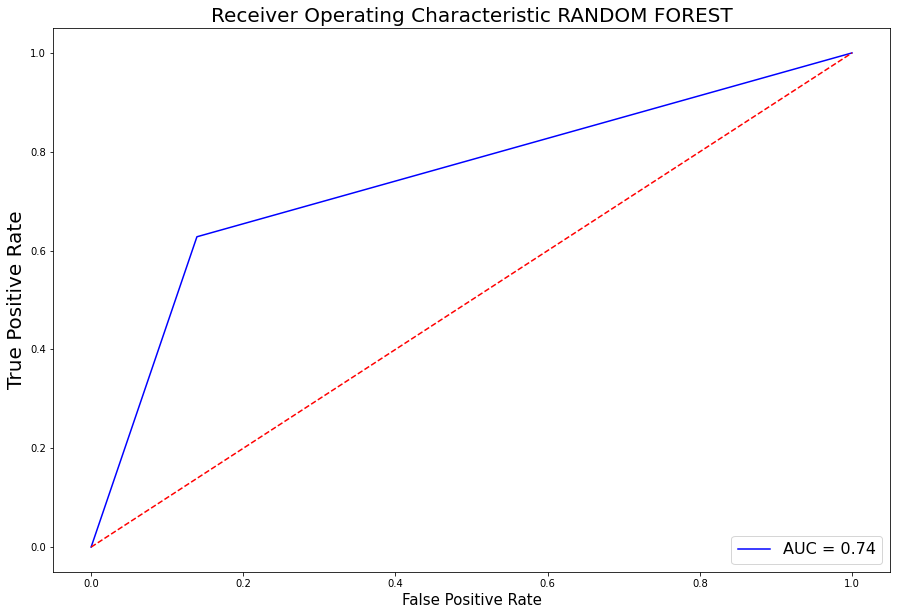


ROC AUC Score Default Random Forest :  0.7106794560704427
ROC AUC Score Tuned Random Forest   :  0.744451173225415


In [ ]:
probs = grid_forest.predict(x_test)
fprgbk, tprgbk, thresholdgbk = metrics.roc_curve(y_test, y_pred_tuned)
roc_aucgbk = metrics.auc(fprgbk, tprgbk)

plt.figure(figsize = (15,10))
plt.plot(fprgbk, tprgbk, 'b', label = 'AUC = %0.2f' % roc_aucgbk)
plt.plot([0, 1], [0, 1],'r--')
plt.title('Receiver Operating Characteristic RANDOM FOREST',fontsize=20)
plt.ylabel('True Positive Rate',fontsize=20)
plt.xlabel('False Positive Rate',fontsize=15)
plt.legend(loc = 'lower right', prop={'size': 16})
plt.show()

print('\nROC AUC Score Default Random Forest : ', roc_auc_default)
print('ROC AUC Score Tuned Random Forest   : ', roc_auc_tuned)

After tuning, the ROC-AUC score slightly increase from 71% becoming 74%. Therefore, we will used tuned Random Forest model for final model.

## **Feature Importance and Feature Selection**

In [ ]:
grid_forest.steps[2][1].feature_importances_

array([7.98160949e-03, 5.34378521e-03, 8.94169434e-03, 9.97149353e-03,
       1.86517754e-03, 3.15598149e-03, 4.07789014e-03, 5.16368526e-03,
       4.00065927e-03, 2.90701376e-03, 4.74705334e-03, 4.02145567e-03,
       6.08401742e-03, 6.09246680e-03, 5.49868903e-03, 7.62171968e-03,
       7.10109150e-03, 5.36272105e-03, 1.50491827e-03, 4.94943337e-04,
       2.53869221e-04, 4.97694061e-03, 3.13945615e-04, 5.61238470e-06,
       2.74046787e-02, 5.48654185e-02, 1.58207874e-02, 3.79126233e-02,
       2.77356208e-02, 1.52281216e-02, 8.65773118e-03, 1.01469789e-02,
       6.21075289e-03, 6.80821668e-03, 6.86919312e-03, 1.97777205e-02,
       1.69383137e-01, 6.88450350e-02, 6.48265996e-02, 1.83159864e-01,
       1.68859086e-01])

In [ ]:
feature_importance = []
for feature_imp in zip(feature_columns, grid_forest.steps[2][1].feature_importances_):
    feature_importance.append(feature_imp)
    
feature_importance.sort(key=lambda a:a[1], reverse=True)
feature_importance

[('euribor3m', 0.18315986429454045),
 ('emp_var_rate', 0.16938313716002096),
 ('nr_employed', 0.16885908627347995),
 ('cons_price_idx', 0.06884503497248923),
 ('cons_conf_idx', 0.0648265996383912),
 ('onehot__x7_not_contacted', 0.05486541852339318),
 ('onehot__x8_success', 0.037912623313649876),
 ('binary__month_0', 0.027735620790932048),
 ('onehot__x7_last_week', 0.027404678696678637),
 ('previous', 0.019777720548668058),
 ('onehot__x8_nonexistent', 0.015820787438749175),
 ('binary__month_1', 0.015228121587583061),
 ('binary__month_3', 0.010146978914509424),
 ('onehot__x1_blue-collar', 0.009971493526783684),
 ('onehot__x0_prime working', 0.008941694343357901),
 ('binary__month_2', 0.008657731180311047),
 ('onehot__x0_elderly', 0.007981609488693364),
 ('onehot__x3_university.degree', 0.0076217196768383335),
 ('onehot__x4_yes', 0.007101091496484404),
 ('binary__day_2', 0.006869193117469531),
 ('binary__day_1', 0.006808216681169912),
 ('binary__day_0', 0.006210752893231474),
 ('onehot__x

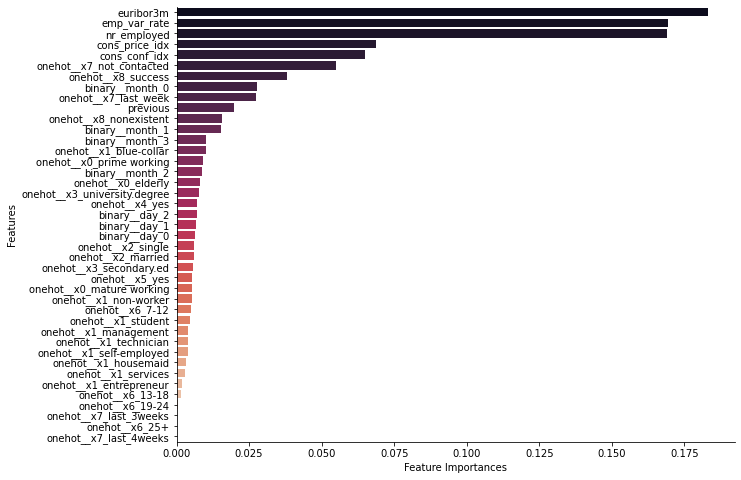

In [ ]:
importances= grid_forest.steps[2][1].feature_importances_
feature_importances= pd.Series(importances, index=feature_columns).sort_values(ascending=False)
plt.figure(figsize=(10,8))
sns.barplot(x=feature_importances[0:], y=feature_importances.index[0:], palette="rocket")
sns.despine()
plt.xlabel("Feature Importances")
plt.ylabel("Features")
plt.show()

The graph displays the importance of a variable/feature. It can be seen that `euroibor3m` is affecting model the most followed by `emp_var_rate` and `nr_employed`. Meanwhile, `campaign_reps` and `pdays_class` has the lowest importance. Then we will re-select the features (removing `campaign_reps` and `pdays_class`) and re-run the model to see if the performance improved.

In [ ]:
bmc_3.columns

Index(['age_group', 'job', 'marital', 'education', 'housing', 'loan', 'month',
       'day', 'campaign_reps', 'pdays_class', 'previous', 'poutcome',
       'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m',
       'nr_employed', 'deposit'],
      dtype='object')

In [ ]:
bmc_4 = bmc_3.drop(columns=['campaign_reps','pdays_class'])
bmc_4.columns

Index(['age_group', 'job', 'marital', 'education', 'housing', 'loan', 'month',
       'day', 'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'deposit'],
      dtype='object')

In [ ]:
transformer2 = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first'), ['age_group','job', 'marital', 'education', 'housing', 'poutcome', 'loan']),
    ('binary', ce.BinaryEncoder(), ['month', 'day'])
], remainder='passthrough')

In [ ]:
x_select = bmc_4.drop(columns=['deposit'])
y_select = bmc_4['deposit']

In [ ]:
x_train2,x_test2,y_train2,y_test2 = train_test_split(x_select, y_select, stratify=y_select, test_size=0.2, random_state = 2022)
x_train2.shape, x_test2.shape, y_train2.shape, y_test2.shape

((30596, 15), (7649, 15), (30596,), (7649,))

In [ ]:
X_train2_transformed = transformer2.fit_transform(x_train2)
X_test2_transformed = transformer2.transform(x_test2)

In [ ]:
feature2 = pd.DataFrame(X_train2_transformed,columns=transformer2.get_feature_names())
feature_columns2 = list(feature2.columns)
feature_columns2

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['onehot__x0_elderly',
 'onehot__x0_mature working',
 'onehot__x0_prime working',
 'onehot__x1_blue-collar',
 'onehot__x1_entrepreneur',
 'onehot__x1_housemaid',
 'onehot__x1_management',
 'onehot__x1_non-worker',
 'onehot__x1_self-employed',
 'onehot__x1_services',
 'onehot__x1_student',
 'onehot__x1_technician',
 'onehot__x2_married',
 'onehot__x2_single',
 'onehot__x3_secondary.ed',
 'onehot__x3_university.degree',
 'onehot__x4_yes',
 'onehot__x5_nonexistent',
 'onehot__x5_success',
 'onehot__x6_yes',
 'binary__month_0',
 'binary__month_1',
 'binary__month_2',
 'binary__month_3',
 'binary__day_0',
 'binary__day_1',
 'binary__day_2',
 'previous',
 'emp_var_rate',
 'cons_price_idx',
 'cons_conf_idx',
 'euribor3m',
 'nr_employed']

## **Modeling with Best Parameters and Selected Features**

In [ ]:
X_under2, y_under2 = rus.fit_resample(x_train2, y_train2)

forest_clf2 = RandomForestClassifier(n_estimators=200, max_depth=8, max_features='sqrt' , random_state=2022, n_jobs=-1)

estimator_rus2 = Pipeline([
        ('preprocess',transformer2),
        ('balancing',rus),
        ('model',forest_clf2)])

rf_cv_ros_select  = cross_val_score(estimator_rus2,
                                X_under2,
                                y_under2,
                                cv = skfold,
                                scoring = 'roc_auc')

In [ ]:
estimator_rus2.fit(X_under2, y_under2)
y_pred_select2 = estimator_rus2.predict(x_test2)

roc_auc_select = roc_auc_score(y_test2, y_pred_select2)

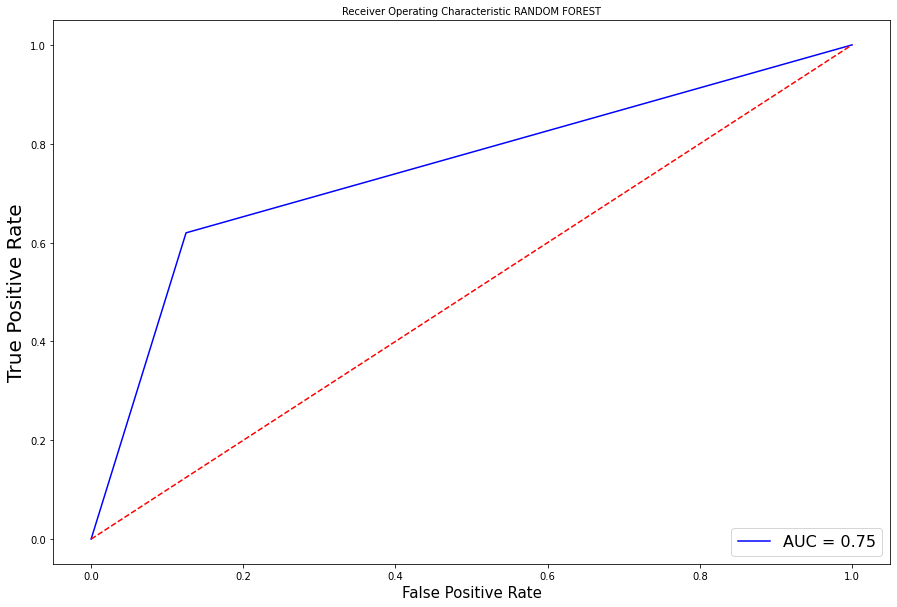


ROC AUC Score Default Random Forest :  0.71
ROC AUC Score Tuned Random Forest   :  0.74
ROC AUC Score Select Random Forest  :  0.75


In [ ]:
probs = estimator_rus2.predict(x_test2)
probs_proba = estimator_rus2.predict_proba(x_test2)
fprgbk, tprgbk, thresholdgbk = metrics.roc_curve(y_test2, probs)
roc_aucgbk = metrics.auc(fprgbk, tprgbk)

plt.figure(figsize = (15,10))
plt.plot(fprgbk, tprgbk, 'b', label = 'AUC = %0.2f' % roc_aucgbk)
plt.plot([0, 1], [0, 1],'r--')
plt.title('Receiver Operating Characteristic RANDOM FOREST',fontsize=10)
plt.ylabel('True Positive Rate',fontsize=20)
plt.xlabel('False Positive Rate',fontsize=15)
plt.legend(loc = 'lower right', prop={'size': 16})
plt.show()

print('\nROC AUC Score Default Random Forest : ', round(roc_auc_default, 2))
print('ROC AUC Score Tuned Random Forest   : ', round(roc_auc_tuned, 2))
print('ROC AUC Score Select Random Forest  : ', round(roc_auc_select, 2))

The score slightly improved from 74% to 75%. Then we will use this model as our final model.

## Confusion Matrix

```
1. True Negative (TN)  | Actual(0) & Predict(0): The model predicts that the consumer will not make a deposit, and the customer does not. 
2. True Positive (TP)  | Actual(1) & Predict(1): The model predicts that the consumer will make a deposit, and the customer does. 
3. False Negative (FN) | Actual(1) & Predict(0): The model predicts that the customer will not make a deposit, however the customer does make a deposit. 
4. False Positive (FP) | Actual(0) & Predict(1): The model predicts a deposit even if the consumer does not make a deposit.
```

### Confusion Matrix - Default Model

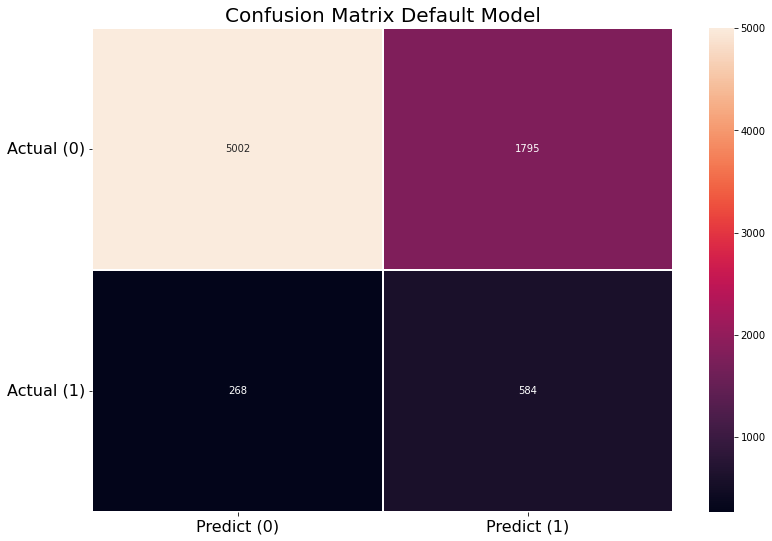

In [ ]:
conf_matrix = confusion_matrix(y_test, y_predict_rus)
f, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", linewidths=.5, ax=ax)
plt.title("Confusion Matrix Default Model", fontsize=20)
plt.subplots_adjust(left=0.15, right=0.99, bottom=0.15, top=0.99)
ax.set_yticks(np.arange(conf_matrix.shape[0]) + 0.5, minor=False)
ax.set_xticklabels(['Predict (0)','Predict (1)'],fontsize=16, rotation=360)
ax.set_yticklabels(['Actual (0)','Actual (1)'], fontsize=16, rotation=360)
plt.show()

### Confusion Matrix Tuned - Feature Selection

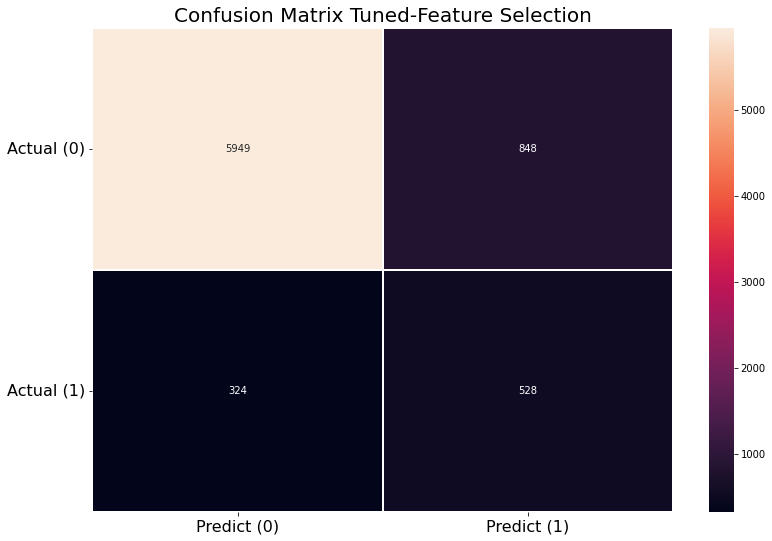

In [ ]:
conf_matrix = confusion_matrix(y_test2, y_pred_select2)
f, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", linewidths=.5, ax=ax)
plt.title("Confusion Matrix Tuned-Feature Selection", fontsize=20)
plt.subplots_adjust(left=0.15, right=0.99, bottom=0.15, top=0.99)
ax.set_yticks(np.arange(conf_matrix.shape[0]) + 0.5, minor=False)
ax.set_xticklabels(['Predict (0)','Predict (1)'],fontsize=16, rotation=360)
ax.set_yticklabels(['Actual (0)','Actual (1)'], fontsize=16, rotation=360)
plt.show()

In [ ]:
report_tuned_select = classification_report(y_test2, y_pred_tuned)
print('Classification Report Tuned Random Forest : \n\n', report_tuned_select)

Classification Report Tuned Random Forest : 

               precision    recall  f1-score   support

           0       0.95      0.86      0.90      6797
           1       0.36      0.63      0.46       852

    accuracy                           0.84      7649
   macro avg       0.66      0.74      0.68      7649
weighted avg       0.88      0.84      0.85      7649



The default model predict 1795 customers as FP class. As we compare with tuning - feature selection model, it can predict 848 customers as FP class. This means that our final model can reduce the FP class as much as ~50%. 

# **Conclusion**

Below a guide in assesing our model:
* 0.9 - 1.0 = excellent
* 0.8 - 0.9 = good
* 0.7 - 0.8 = fair
* 0.6 - 0.7 = poor
* 0.5 - 0.6 = fail
<br> Source: [Model Scoring](https://medium.com/@sardina.aleigha/bank-marketing-a-classification-exercise-fd9b77a1da4d)

Our model has fair performance as we obtain 0.75 of ROC-AUC score. On Bank's Marketing Campaign, between False Positive (FP) and False Negative (FN), we want to suppress the prediction on FP. Because higher FP value means we predict the customer will subscribe to a deposit but in actual they don't. Having this condition the telemarketer will waste more resource on non-prostective customers. Not only do we lost the profit but also it becomes a burden for operational cost.
Why we not focused on minimize the False Negative (FN)? FN means that we predict the customer not do the deposit but they actually do the deposit, this didnt give any loss for business. Why ? Because at last they do the deposit, and we dont use any marketing cost to make them do the deposit.

On the otherhand, based on confusion matrix output, our model can reduce the FP class from 1795 customers to 848 customers. This mean we can reduce up to +50% of the big loss operational business cost and efficiency can be reach. For example :

* FP  Simulation Default
Total Customer = 2000 persons
Total FP = 1795 persons
<br> Marketing cost = 1 /persons
<br> Revenue = 10 /persons
<br> Total marketing Cost : 1 * 2000 = 2000
<br> Total Revenue = 10 * (2000-1795) = 2050
<br> Total Profit = 2050 - 2000 = 50

* FP Simulation After Feature Selection
Total Customer = 2000 persons
Total FP = 848 persons
<br> Marketing cost = 1 / persons
<br> Revenue = 10 / persons
<br> Total marketing Cost : 1 * 2000 = 2000
<br> Total Revenue = 10 * (2000-848) = 11,520
<br> Total Profit = 11520 - 2000 = 9,520

As following example, we can see that there are big efficiency & effectiveness in 


# **Recommendation**

The following are some significant factors that should be prioritized in order to increase campaign success rates: 

- Loan & Balance: We discovered that many term deposit subscribers were loan-free. There are also those who have a loan but have not subscribed to the deposit, as well as those who do not have a loan but have not signed to the deposit. The primary reason for this is balance. Those with a sufficient amount are more likely to subscribe to a term deposit. 

- Contacts: Based on our findings, the majority of customers that subscribe to deposit have had contacted less than six time. Hence, contacting someone more than six times should be avoided.

- Jobs: Targeting students, non-workers, or admin will result in more success. Furthermore, the data revealed that those with employment professions such as blue-collar, entrepreneur, services, house-maid, and so on had a very low favorable reaction. Contact with such persons should be avoided, or at the very least, other aspects such as balance, debt, and education should be considered before addressing them. Overall, this component should be used in conjunction with education. 

- Education is a minor yet crucial thing to consider. According to our findings, there are many subscribers with a strong educational background. We feel that an intelligent person with some understanding of investing will take some extra time to understand the offer presented.

-We can also adding another related features such as saving balances

THANKYOU